# Telecom churn case study

## Business problem

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

So we need to analyse telecom industry data and predict high value customers who are at high risk of churn and identify main indicators of churn

In [3]:
import time
s1time = time.clock()
# Importing libraries
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import sklearn.metrics as metrics
from sklearn.model_selection  import StratifiedKFold
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

C:\Users\srmurug\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


In [4]:
# Load Data Set
telecom_df =  pd.read_csv('telecom_churn_data.csv')

In [5]:
pd.options.display.max_columns = 250
pd.options.display.max_rows = 2000
pd.options.display.float_format = '{:.2f}'.format

In [6]:
telecom_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.38,214.82,213.80,21.10,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,0.00,0.00,nan,nan,0.16,nan,nan,nan,4.13,nan,nan,nan,1.15,nan,nan,nan,5.44,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,5.44,0.00,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,na

In [7]:
telecom_df.info(verbose= 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

In [8]:
telecom_df.shape

(99999, 226)

### Filter High Value Customers

Filter High Value Customers are those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [9]:
# calculate the total data recharge amount for June and July --> number of recharges * average recharge amount
telecom_df['total_data_rech_6'] = telecom_df['total_rech_data_6'] * telecom_df['av_rech_amt_data_6']
telecom_df['total_data_rech_7'] = telecom_df['total_rech_data_7'] * telecom_df['av_rech_amt_data_7']

telecom_df['amt_data_6'] = telecom_df[['total_rech_amt_6','total_data_rech_6']].sum(axis=1)
telecom_df['amt_data_7'] = telecom_df[['total_rech_amt_7','total_data_rech_7']].sum(axis=1)

telecom_df['AVG_amt_data_6_7'] = telecom_df[['amt_data_6','amt_data_7']].mean(axis=1)

In [10]:
telecom_df[['total_rech_amt_6','total_rech_amt_7','AVG_amt_data_6_7']].quantile([0.25,0.5,0.7,0.75,0.9])

,total_rech_amt_6,total_rech_amt_7,AVG_amt_data_6_7
0.25,109.00,100.00,128.00
0.50,230.00,220.00,275.00
0.70,378.00,370.00,478.00
0.75,437.50,428.00,553.00
0.90,732.00,731.00,1028.00


In [11]:
telecom_df = telecom_df[(telecom_df['AVG_amt_data_6_7']> telecom_df['AVG_amt_data_6_7'].quantile(0.7))]
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Columns: 231 entries, mobile_number to AVG_amt_data_6_7
dtypes: float64(184), int64(35), object(12)
memory usage: 53.0+ MB


In [12]:
telecom_df.shape

(29953, 231)

### Identify Churn Customers

Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are: <b>
    
<b><b>●	total_ic_mou_9 <b><b>
    
<b><b>●	total_og_mou_9 <b><b>
    
<b><b>●	vol_2g_mb_9 <b><b>
    
<b><b>●	vol_3g_mb_9 <b><b>


In [13]:
telecom_df['churn_flag'] = np.where(
                            ((telecom_df['total_ic_mou_9'] == 0.00) | (telecom_df['total_og_mou_9'] == 0.00))
                            & ((telecom_df['vol_2g_mb_9'] == 0.00) | (telecom_df['vol_3g_mb_9'] == 0.00))
                            , 1, 0)

In [14]:
print(telecom_df['churn_flag'].value_counts())
print(telecom_df['churn_flag'].value_counts()/telecom_df.shape[0])

0    26698
1     3255
Name: churn_flag, dtype: int64
0   0.89
1   0.11
Name: churn_flag, dtype: float64


We can see that the distribution of Churn Data is not uniform. 89.13% Customers has not Churned. Only 10.86% Customers have Churned.

Let's drop all features related to churn phase i.e. 9th month

In [15]:
telecom_df.drop(telecom_df.filter(regex= '_9|sep',axis= 1).columns,axis=1,inplace= True)

In [16]:
telecom_df.shape

(29953, 177)

#### Lets check for NULL values

In [17]:
MissingDF = pd.DataFrame(round(telecom_df.isnull().sum()/telecom_df.shape[0],4) * 100).reset_index().rename(columns={'index':'Feature',0:'Missing %'}).sort_values(by='Missing %',ascending = False)
MissingDF

,Feature,Missing %
145,arpu_3g_8,46.80
151,night_pck_user_8,46.80
121,date_of_last_rech_data_8,46.80
127,max_rech_data_8,46.80
130,count_rech_2g_8,46.80
133,count_rech_3g_8,46.80
136,av_rech_amt_data_8,46.80
124,total_rech_data_8,46.80
166,fb_user_8,46.80
148,arpu_2g_8,46.80


We can see that there is a huge chunk of data which are Null Values.
Before we handle these, let's check if any columns values are always constant or not changing


In [18]:
unique_stats = pd.DataFrame(telecom_df.nunique()).reset_index().rename(columns = {'index': 'feature', 0: 'nunique'})
print(unique_stats[unique_stats['nunique'] == 1])

print('\n %d features with a single unique value.\n' % len(unique_stats[unique_stats['nunique'] == 1]))

                 feature  nunique
1              circle_id        1
2         loc_og_t2o_mou        1
3         std_og_t2o_mou        1
4         loc_ic_t2o_mou        1
5   last_date_of_month_6        1
6   last_date_of_month_7        1
7   last_date_of_month_8        1
47      std_og_t2c_mou_6        1
48      std_og_t2c_mou_7        1
49      std_og_t2c_mou_8        1
86      std_ic_t2o_mou_6        1
87      std_ic_t2o_mou_7        1
88      std_ic_t2o_mou_8        1

 13 features with a single unique value.



In [19]:

telecom_df = telecom_df.drop(columns = list(unique_stats[unique_stats['nunique'] == 1]['feature']))

In [20]:
telecom_df.shape

(29953, 164)

Handle Missing Values

Let's start with one of the highest missing feature arpu_3g_8

In [21]:
telecom_df['arpu_3g_8'].isna().sum()

14018


~46% of the data is missing. 
How can we impute them? using mean or median etc; 
Let's check them

In [22]:
telecom_df['arpu_3g_8'].describe(percentiles = [0.25,0.5,0.75,0.90,0.95,0.99])


count   15935.00
mean      118.11
std       218.98
min       -24.49
25%         0.00
50%        10.02
75%       179.63
90%       356.34
95%       515.85
99%      1005.25
max      3716.90
Name: arpu_3g_8, dtype: float64

We can see that the data is not distribured. Max value is 3716 and 75 Percentile is 179. Therefore we cannot impute the null values with mean/median

Let's check data related variables of 8th month to decide on filling up the missing values

In [23]:
dataRelatedvar_8 = ['date_of_last_rech_data_8','total_rech_data_8','max_rech_data_8','count_rech_2g_8', 
                            'count_rech_3g_8', 'av_rech_amt_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'arpu_2g_8',
                            'night_pck_user_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8',
                            'fb_user_8']
telecom_df[telecom_df['arpu_3g_8'].isnull()][dataRelatedvar_8].nunique()

date_of_last_rech_data_8    0
total_rech_data_8           0
max_rech_data_8             0
count_rech_2g_8             0
count_rech_3g_8             0
av_rech_amt_data_8          0
vol_2g_mb_8                 1
vol_3g_mb_8                 1
arpu_2g_8                   0
night_pck_user_8            0
monthly_2g_8                1
sachet_2g_8                 1
monthly_3g_8                1
sachet_3g_8                 1
fb_user_8                   0
dtype: int64

We can infer that the customers hasn't bought the data at all in 8th month. 
Let's fill the gap as 0

In [24]:
telecom_df['arpu_3g_8'].fillna(0,inplace=True)

It's clear from the Null Value table that most of the missing values are from mobile data related only. We can follow the same approach and fill the gap.

In [25]:
telecom_df[dataRelatedvar_8].fillna(0,inplace = True)

Let's check the other missing feature 'isd_og_mou_8'

In [26]:
telecom_df['isd_og_mou_8'].isna().sum()

1172

In [27]:
telecom_df['isd_og_mou_8'].describe()

count   28781.00
mean        2.03
std        45.65
min         0.00
25%         0.00
50%         0.00
75%         0.00
max      5681.54
Name: isd_og_mou_8, dtype: float64


We can clearly evident the range varies from 0.0 to 5681.54 
It looks like the presence of outliers 
Let's check the all outgoing related features of 8th month

In [28]:
ogRelatedVars_8 = ['loc_og_mou_8', 'std_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'total_og_mou_8']
telecom_df[telecom_df.isd_og_mou_8.isnull()][ogRelatedVars_8].nunique()

loc_og_mou_8      0
std_og_mou_8      0
spl_og_mou_8      0
og_others_8       0
total_og_mou_8    1
dtype: int64

In [29]:
telecom_df[telecom_df.isd_og_mou_8.isnull()][ogRelatedVars_8].head()

,loc_og_mou_8,std_og_mou_8,spl_og_mou_8,og_others_8,total_og_mou_8
111,nan,nan,nan,nan,0.00
188,nan,nan,nan,nan,0.00
358,nan,nan,nan,nan,0.00
527,nan,nan,nan,nan,0.00
539,nan,nan,nan,nan,0.00



From the above we can impute the missing values of isd_og_mou_8 with 0. 


For the rest of features as well we can conclude that the missing values can be imputed with 0 values.

In [30]:
telecom_df.isd_og_mou_8.fillna(0,inplace =True)

In [31]:
telecom_df[ogRelatedVars_8].fillna(0,inplace = True)

Lets Impute other columns with zero later

# Exploratory Data Analysis


0   0.89
1   0.11
Name: churn_flag, dtype: float64


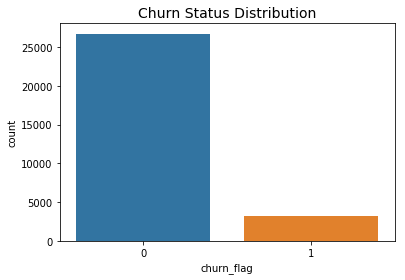

In [32]:
sns.countplot(telecom_df.churn_flag)
plt.title('Churn Status Distribution',fontsize=14)
print(telecom_df['churn_flag'].value_counts()/telecom_df.shape[0])

Since only 10.8% customers have churned, we can infer that data is imbalanced 

Imbalance data distribution is an important part of machine learning workflow. An imbalanced dataset means instances of one of the two classes is higher than the other, in another way, the number of observations is not the same for all the classes in a classification dataset.

### Mobile Number

In [33]:
telecom_df.mobile_number.nunique()

29953

There are 29953 unique values for the mobile number and we can ignore this column from analysis

## arpu (Average Revenue per user)¶


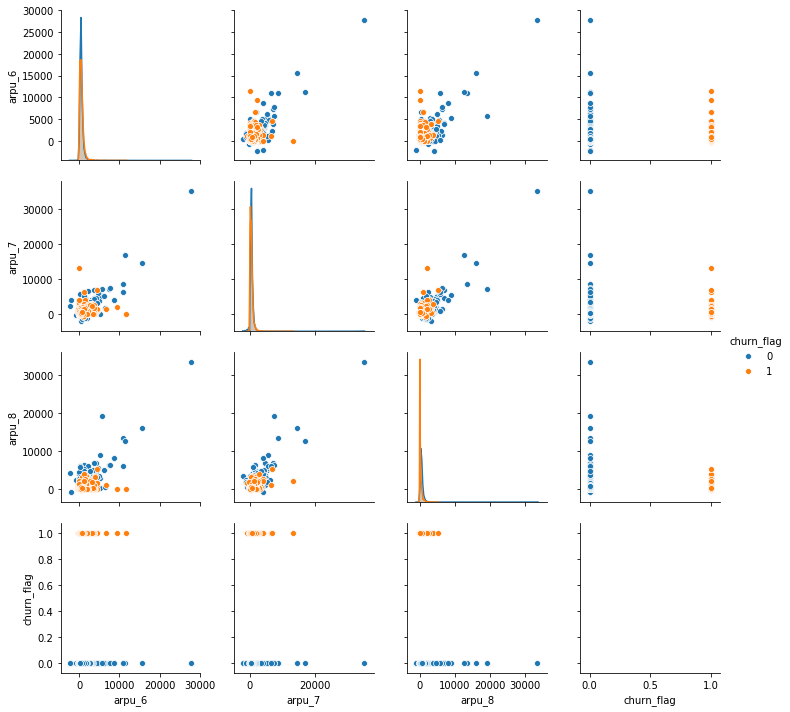

In [34]:
sns.pairplot(data = telecom_df[['arpu_6','arpu_7','arpu_8','churn_flag']],hue = 'churn_flag')

In [35]:
#plot with Inter Quartile treatment for Outliers
def plotAnalysis(feature):
    fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
    ax = sns.distplot(telecom_df[telecom_df['churn_flag']==1][feature], bins = 30, ax = axes[0], kde = True)
    ax.set_title('Churn')
    ax = sns.distplot(telecom_df[telecom_df['churn_flag']==0][feature], bins = 30, ax = axes[1], kde = True)
    ax.set_title('Non-Churn')
    q1 = telecom_df[feature].quantile(0.25)
    q3 = telecom_df[feature].quantile(0.75)
    qr = q3 - q1
    telecom_df_new = telecom_df[(telecom_df[feature] > (q1 - 1.5 * qr ))  & (telecom_df[feature] < (q3 + 1.5 * qr )) ]
    fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(12, 4))
    sns.boxplot(x='churn_flag', y= feature, data=telecom_df_new)

Lets plot Average revenue per user for the Month of June

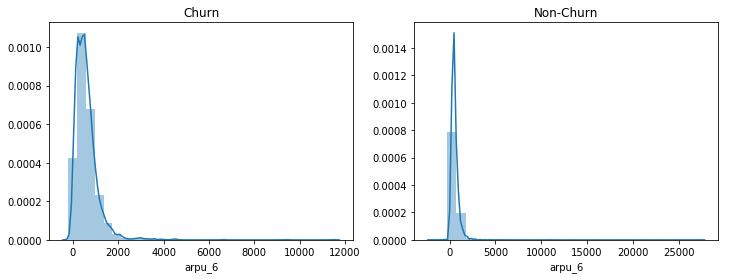

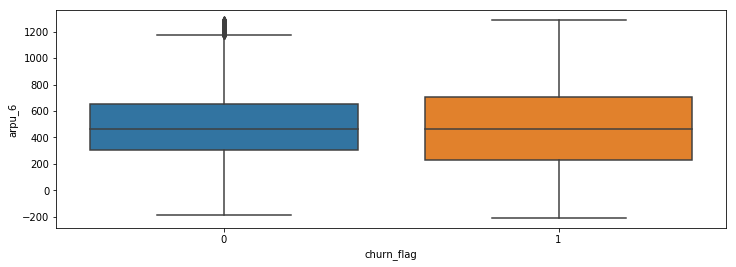

In [36]:
plotAnalysis('arpu_6')


We could see that after Outlier treatment,the mean Average Revenue per User for not churned customers is around __450__  and for churned customers is around __425__

### onnet_mou (On network/ within the same network usage)¶

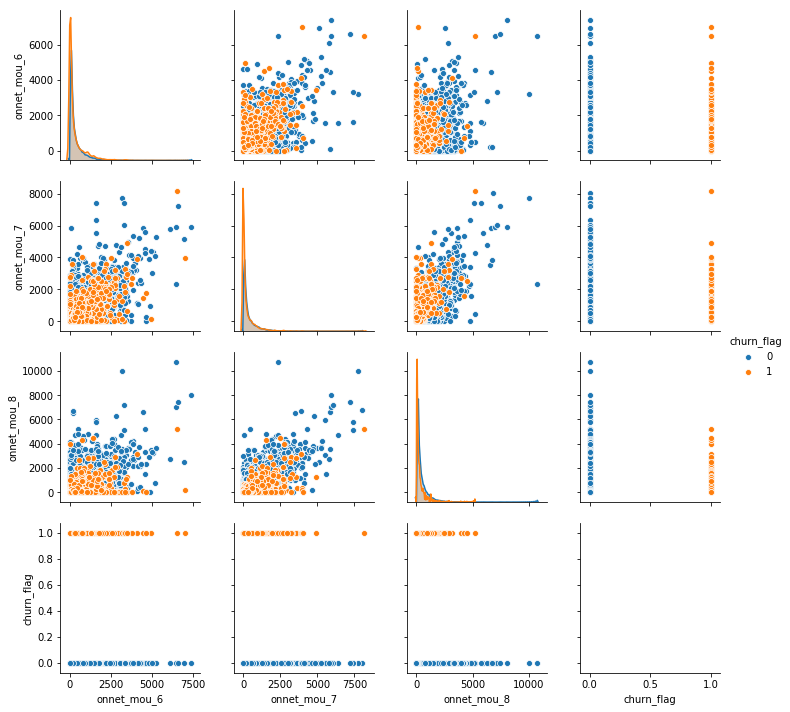

In [37]:
sns.pairplot(data = telecom_df[['onnet_mou_6','onnet_mou_7','onnet_mou_8','churn_flag']],hue = 'churn_flag')

Lets plot On network/ within the same network usage for the Month of June

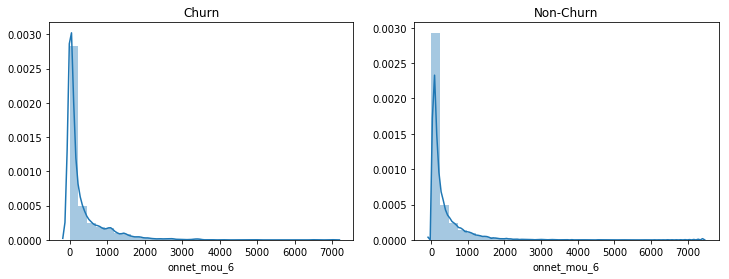

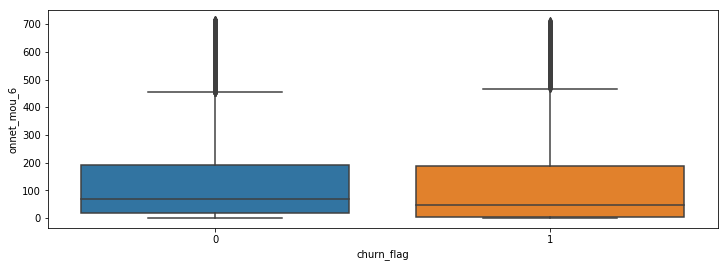

In [38]:
plotAnalysis('onnet_mou_6')

We could see that after Outlier treatment, the mean network usage made by not churned customers is around __50__ and by churned customers is around __60__  

### Offnet_mou (Calls outside of the operator network)

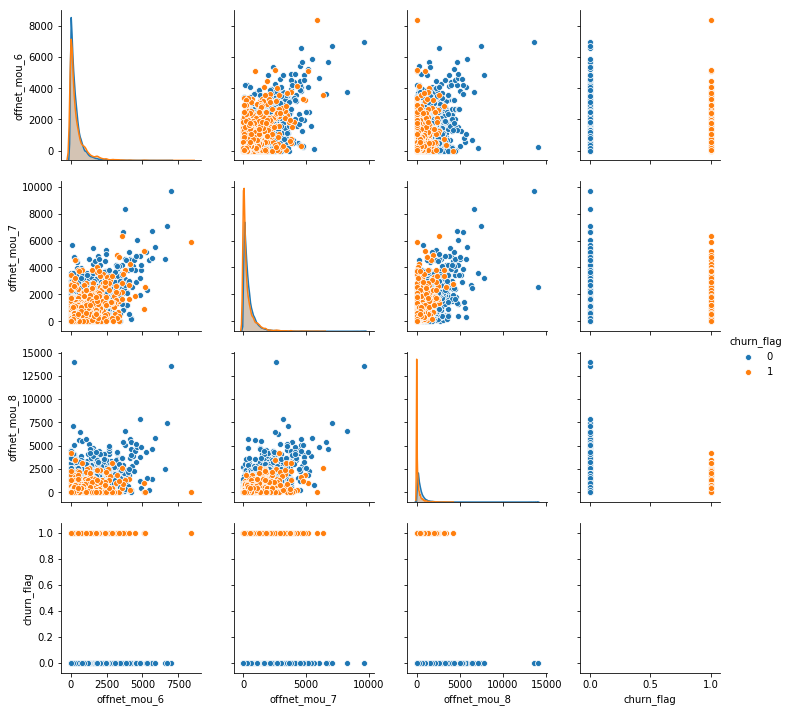

In [39]:
sns.pairplot(data=telecom_df[['offnet_mou_6','offnet_mou_7','offnet_mou_8','churn_flag']],hue='churn_flag')

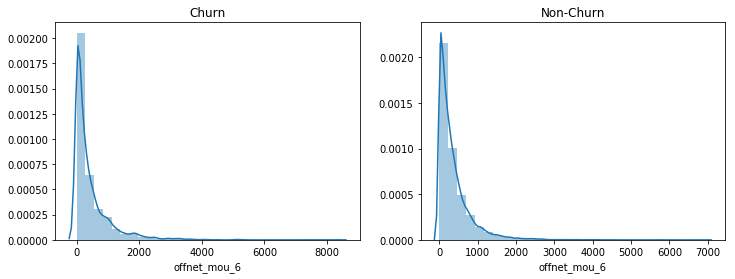

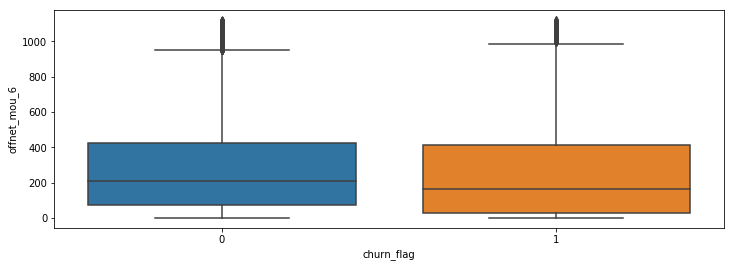

In [40]:
plotAnalysis('offnet_mou_6')

We could see that after Outlier treatment, mean number of calls outside of the operator network made by not churned customers is around 200 and churned customers is around 180

### roam_ic_mou (Customer in roaming zone)

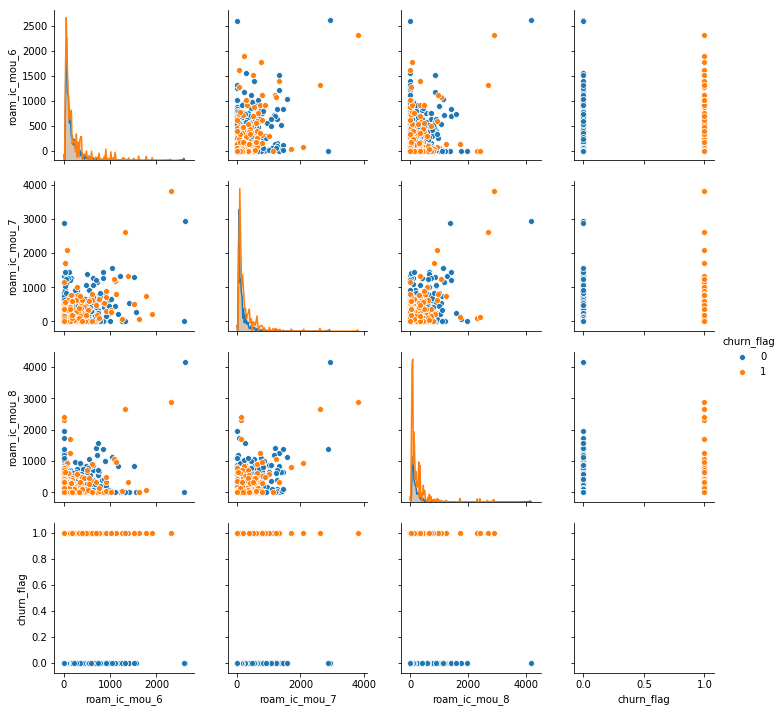

In [41]:
sns.pairplot(data=telecom_df[['roam_ic_mou_6','roam_ic_mou_7','roam_ic_mou_8','churn_flag']],hue='churn_flag')

Text(0.5, 1.0, 'Non-Churn')

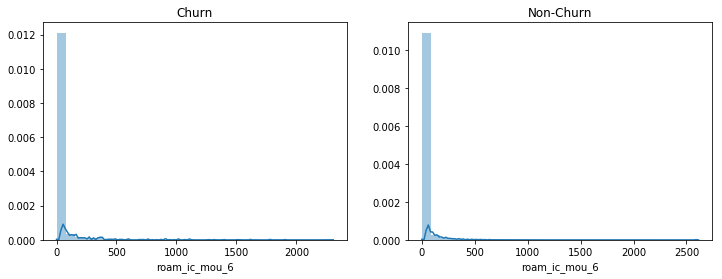

In [42]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(telecom_df[telecom_df['churn_flag']==1]['roam_ic_mou_6'], bins = 30, ax = axes[0], kde = True)
ax.set_title('Churn')
ax = sns.distplot(telecom_df[telecom_df['churn_flag']==0]['roam_ic_mou_6'], bins = 30, ax = axes[1], kde = True)
ax.set_title('Non-Churn')

### isd_og (international calling)

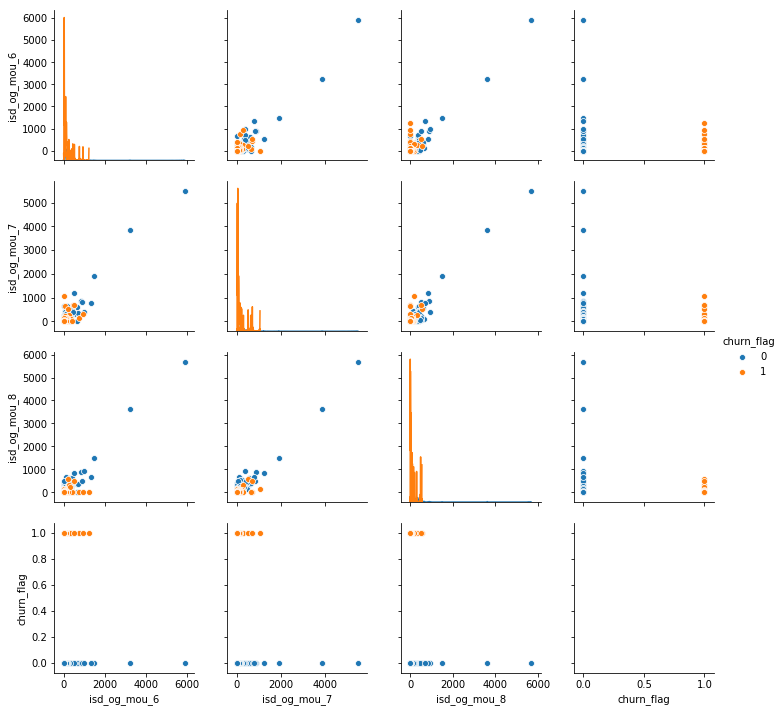

In [43]:
sns.pairplot(data=telecom_df[['isd_og_mou_6','isd_og_mou_7','isd_og_mou_8','churn_flag']],hue='churn_flag')

Text(0.5, 1.0, 'Non-Churn')

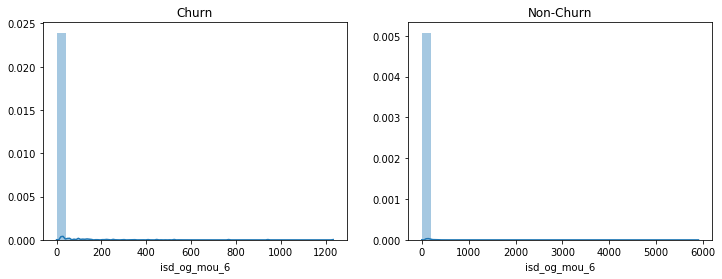

In [44]:

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
ax = sns.distplot(telecom_df[telecom_df['churn_flag']==1]['isd_og_mou_6'], bins = 30, ax = axes[0], kde = True)
ax.set_title('Churn')
ax = sns.distplot(telecom_df[telecom_df['churn_flag']==0]['isd_og_mou_6'], bins = 30, ax = axes[1], kde = True)
ax.set_title('Non-Churn')

### totalog (All outgoing calls by the customer)

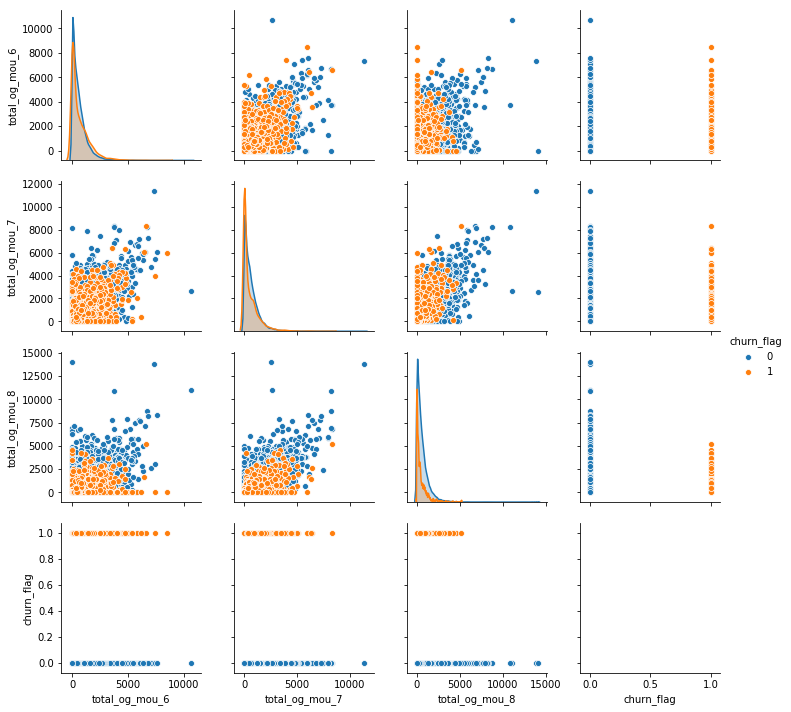

In [45]:
sns.pairplot(data=telecom_df[['total_og_mou_6','total_og_mou_7','total_og_mou_8','churn_flag']],hue='churn_flag')

Lets plot all outgoing calls by the customer for the Month of June

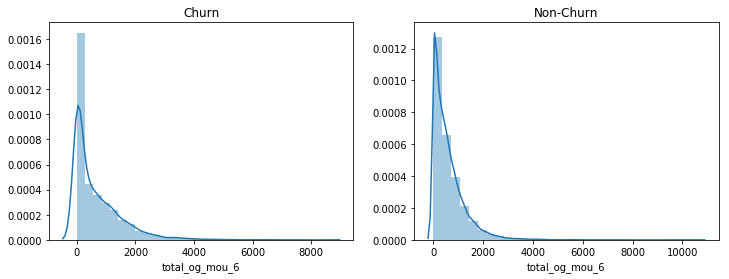

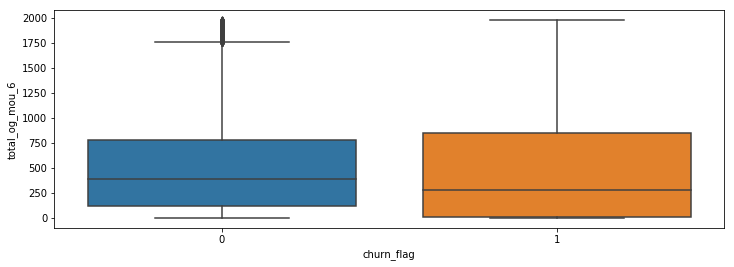

In [46]:
plotAnalysis('total_og_mou_6')

We could see that after Outlier treatment, mean number of outgoing calls made by not churned customers is around __300__ and churned customers is around __200__


### locic (incoming local calls)

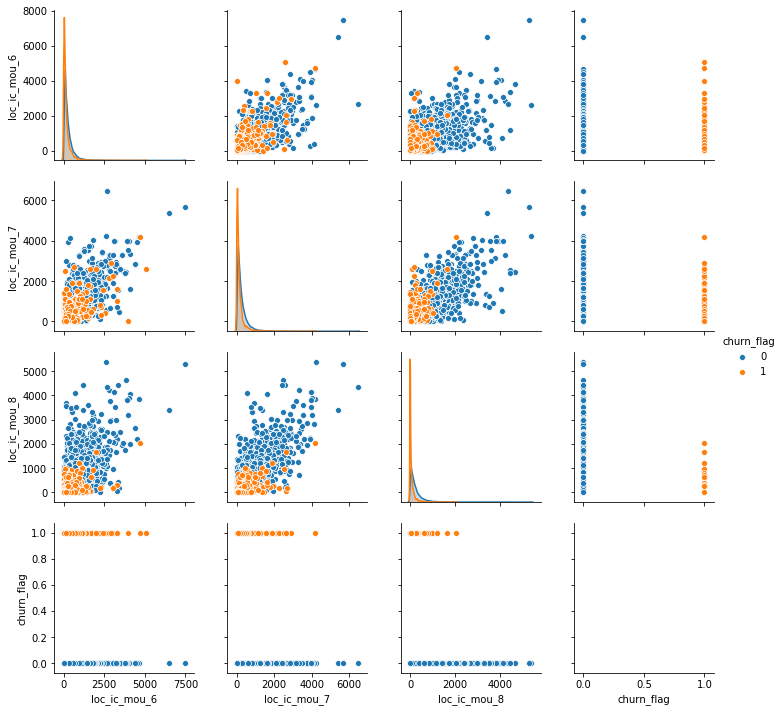

In [47]:
sns.pairplot(data=telecom_df[['loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8','churn_flag']],hue='churn_flag')


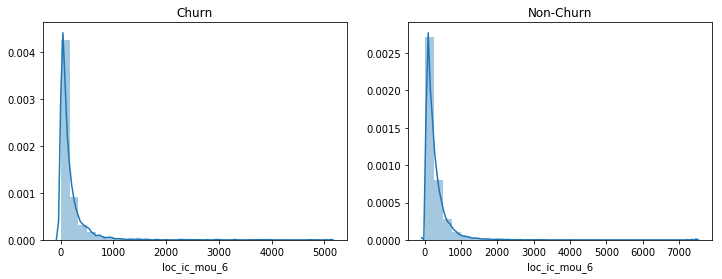

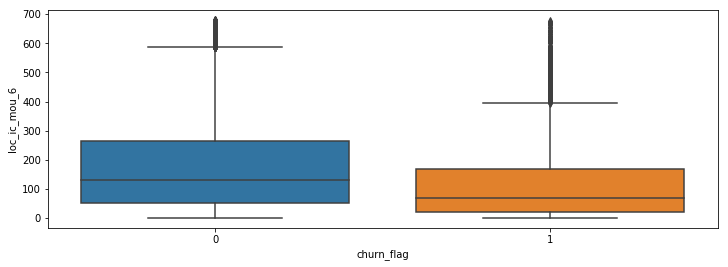

In [48]:
plotAnalysis('loc_ic_mou_6')

We could see that after Outlier treatment, mean number of incoming calls received by not churned customers is around __120__ and churned customers is around __70__

#### stdic (Outside circle incoming calls)

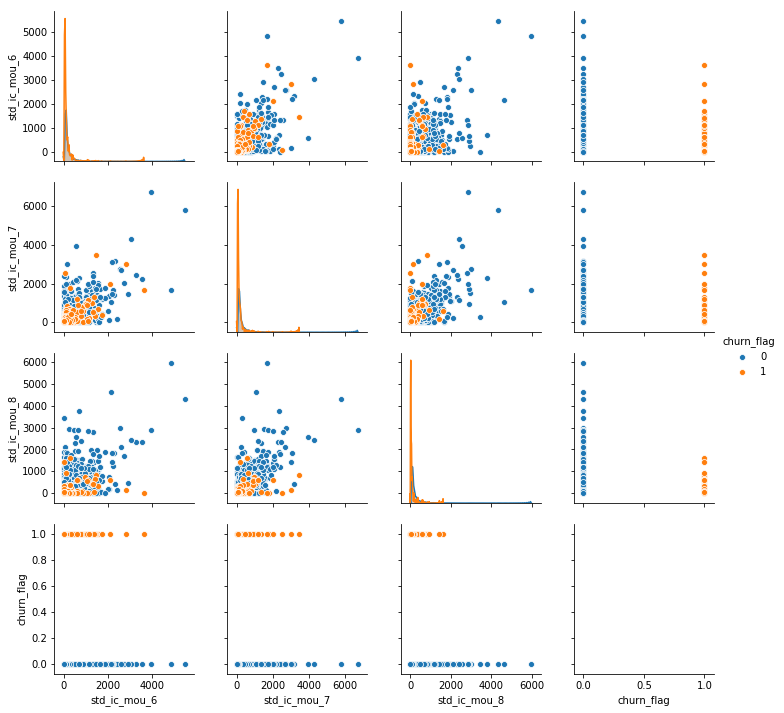

In [49]:
sns.pairplot(data=telecom_df[['std_ic_mou_6','std_ic_mou_7','std_ic_mou_8','churn_flag']],hue='churn_flag')


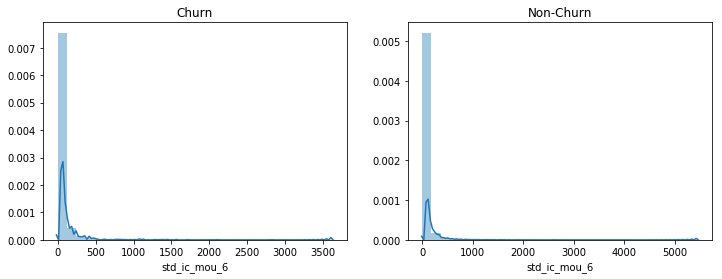

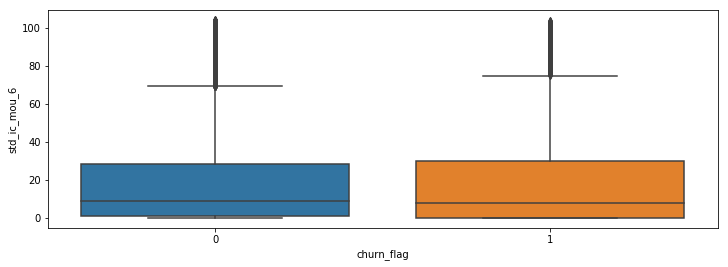

In [50]:
plotAnalysis('std_ic_mou_6')

We could see that after Outlier treatment, mean number of Outside circle incoming calls received by not churned customers is around __15__ and churned customers is around __10__

### totalic (All incoming calls received by a person)

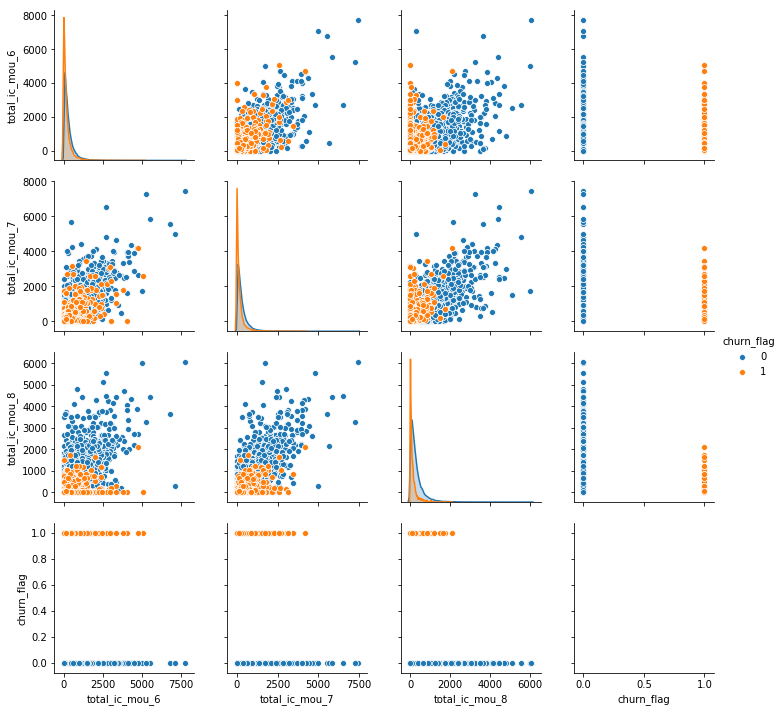

In [51]:
sns.pairplot(data=telecom_df[['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8','churn_flag']],hue='churn_flag')


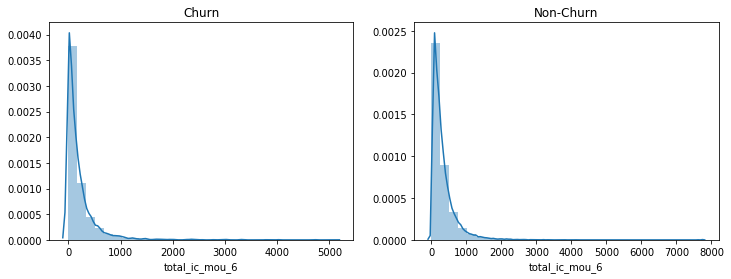

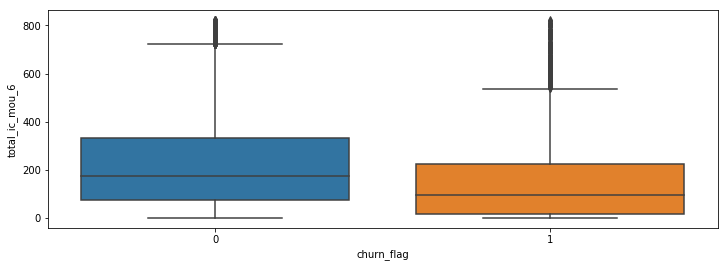

In [52]:
plotAnalysis('total_ic_mou_6')

We could see that after Outlier treatment, mean number of all incoming calls received by not churned customers is around __185__ and churned customers is around __150__

### total_rechnum (Number of times a subscriber recharged his mobile)

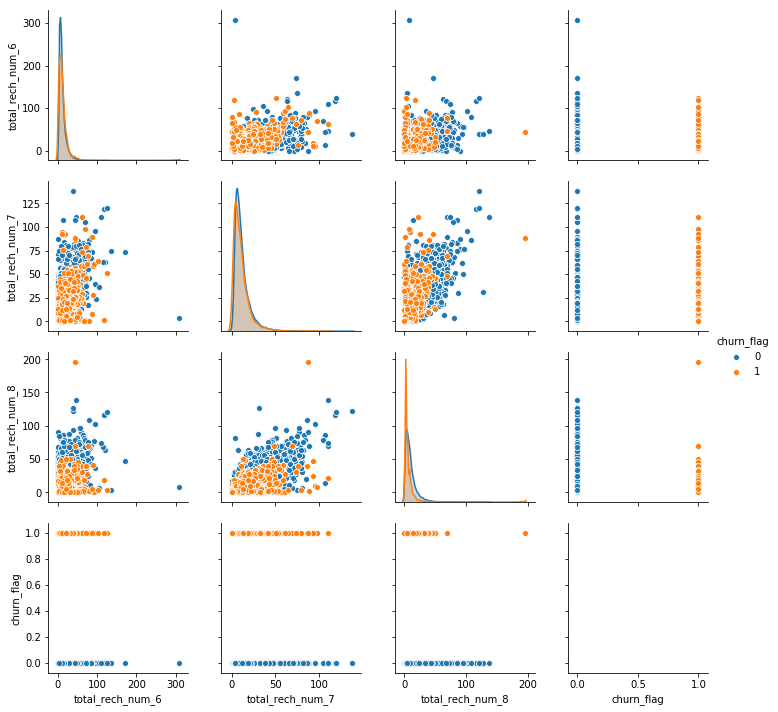

In [53]:
sns.pairplot(data=telecom_df[['total_rech_num_6','total_rech_num_7','total_rech_num_8','churn_flag']],hue='churn_flag')


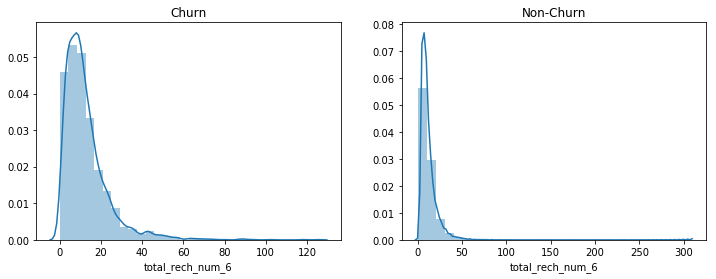

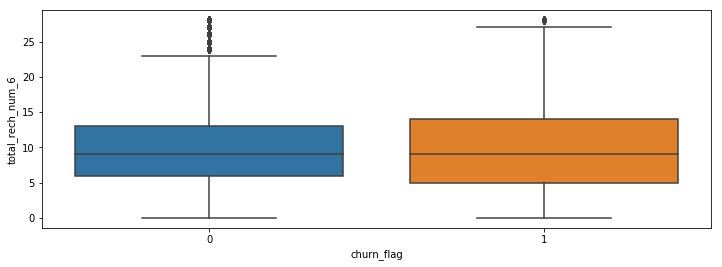

In [54]:
plotAnalysis('total_rech_num_6')

We could see that after Outlier treatment, in the month of June, mean number of recharges made by not churned customers is around 9 and that made by churned customers is around  7

### total_rechamt
#### Total recharge amount in a particular month

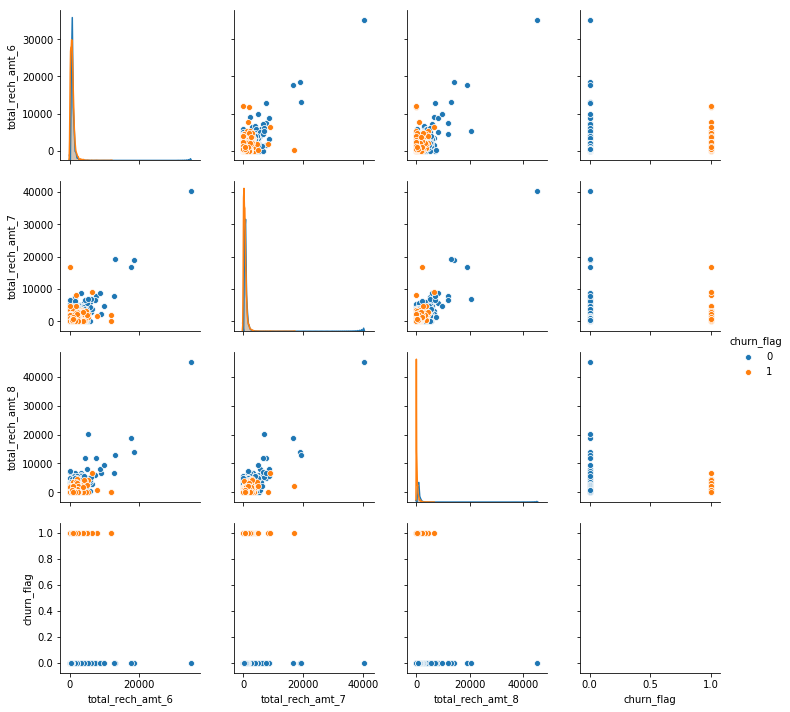

In [55]:
sns.pairplot(data=telecom_df[['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','churn_flag']],hue='churn_flag')

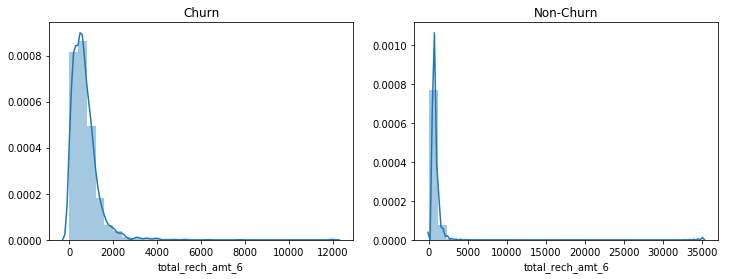

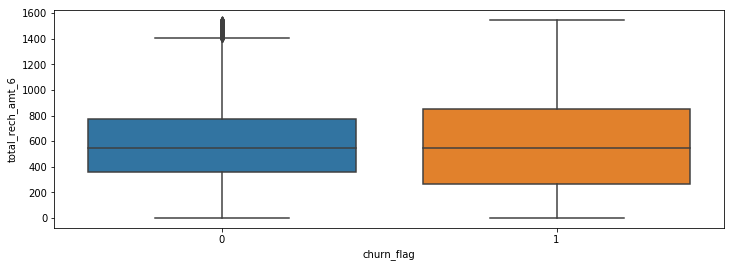

In [56]:
plotAnalysis('total_rech_amt_6')

We could see that after Outlier treatment, in the month of June, mean of total recharge amount made by not churned customers is around 590 and that made by churned customers is around  550

### total_rechdata
#### Total number of times mobile data has been recharged

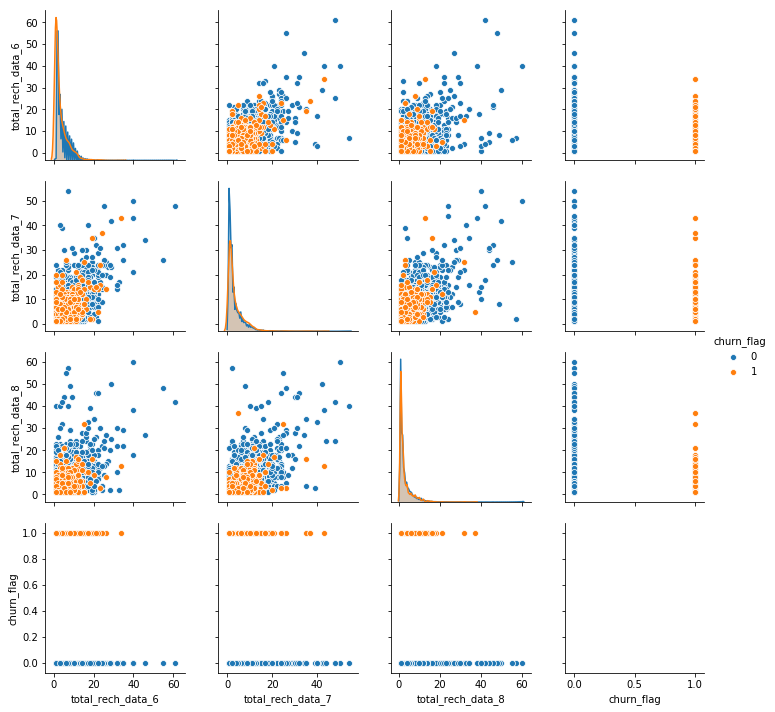

In [57]:
sns.pairplot(data=telecom_df[['total_rech_data_6','total_rech_data_7','total_rech_data_8','churn_flag']],hue='churn_flag')


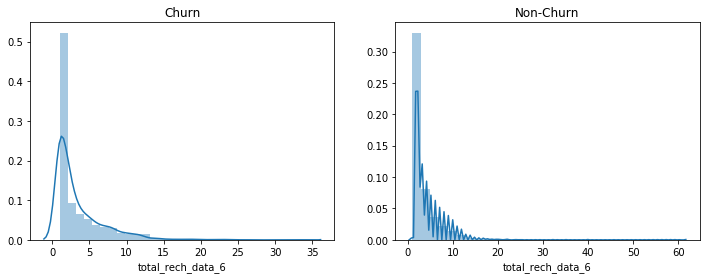

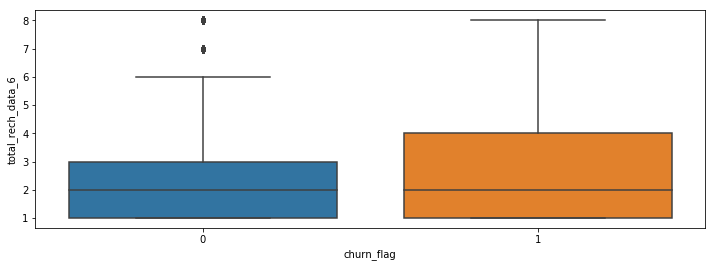

In [58]:
plotAnalysis('total_rech_data_6')

We could see that after Outlier treatment, in the month of June, mean of total number of times mobile data has been recharged by not churned customers is around 2 and that made by churned customers is also around  2

### vol_2gmb
#### Internet usage in MB

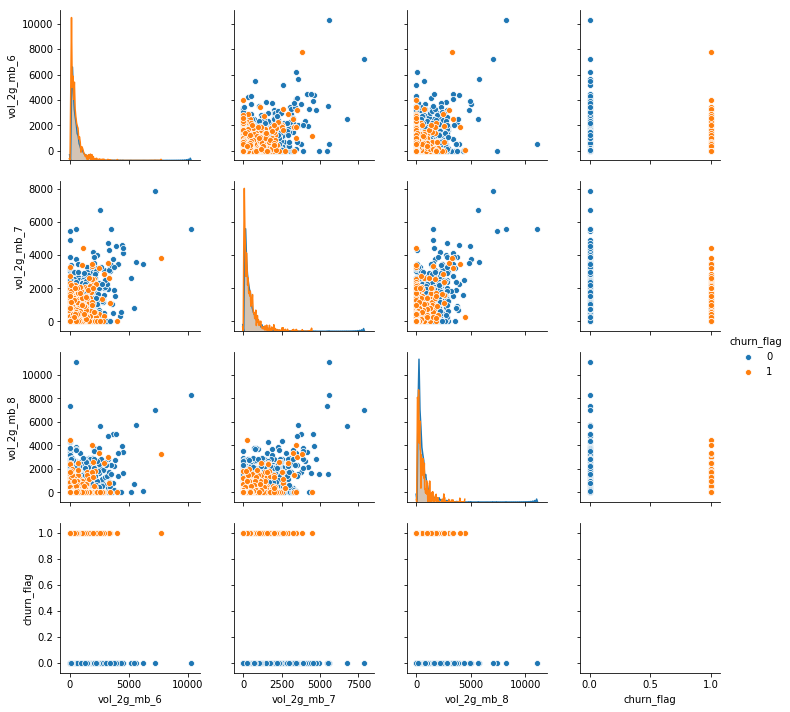

In [59]:
sns.pairplot(data=telecom_df[['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','churn_flag']],hue='churn_flag')


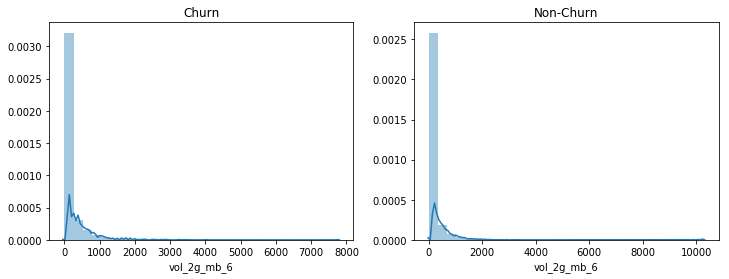

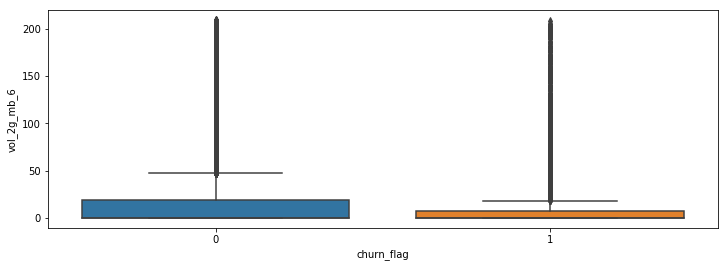

In [60]:
plotAnalysis('vol_2g_mb_6')

### vol_3gmb
#### Internet usage in MB

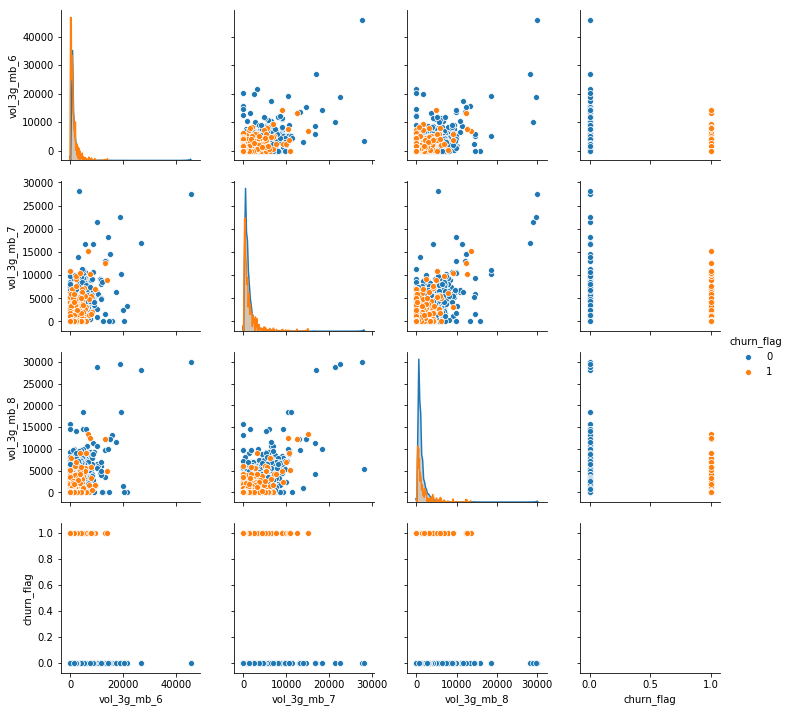

In [61]:
sns.pairplot(data=telecom_df[['vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8','churn_flag']],hue='churn_flag')


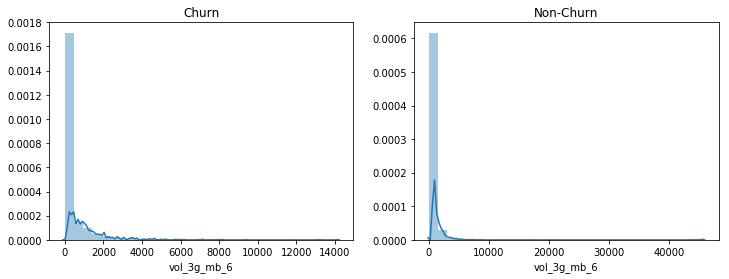

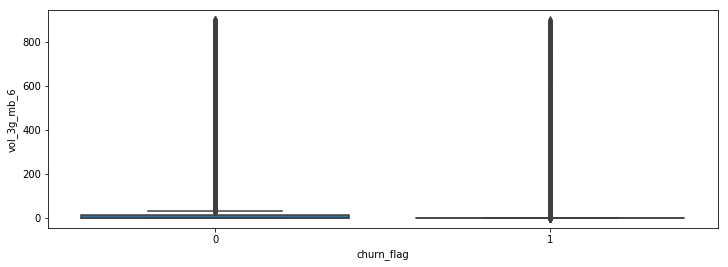

In [62]:
plotAnalysis('vol_3g_mb_6')

### vbc3g
#### Volume based cost - paid as per usage

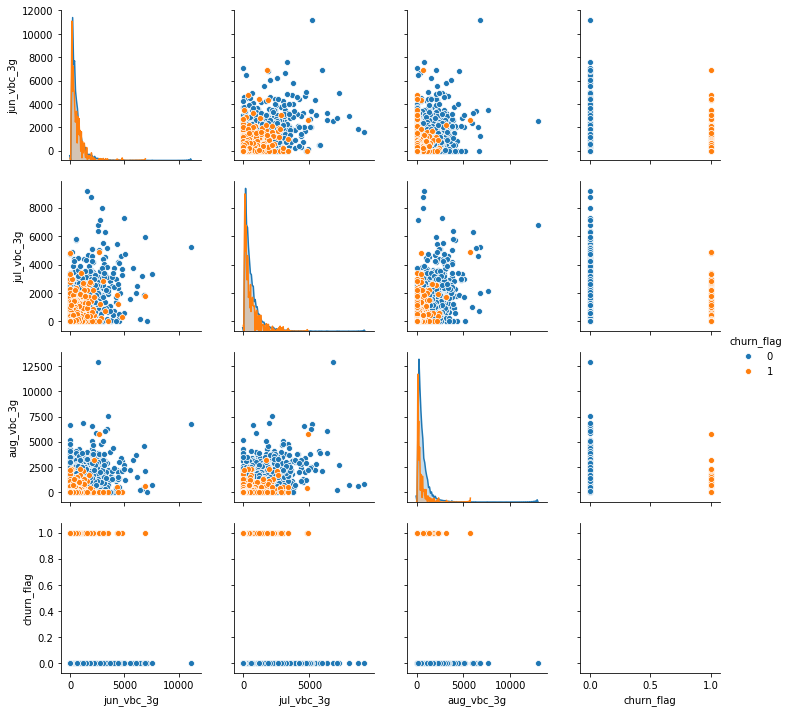

In [63]:
sns.pairplot(data=telecom_df[['jun_vbc_3g','jul_vbc_3g','aug_vbc_3g','churn_flag']],hue='churn_flag')


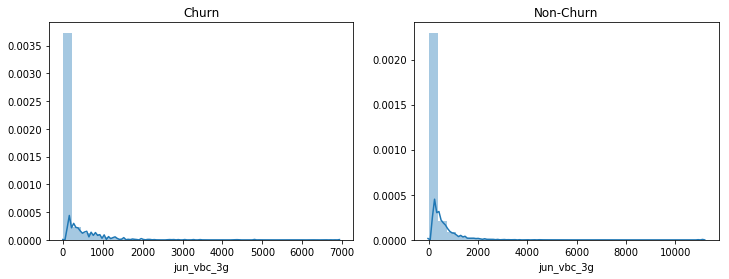

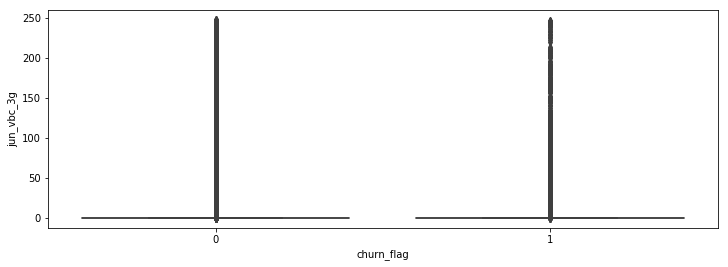

In [64]:
plotAnalysis('jun_vbc_3g')

Across the features, the behaviours are different. But both churned and not churned customer's behavior across every fetures are almost same. Therefore none of the above analysed features could not be ignored for Model Building

## Derived Features

Formatting various Date features

In [65]:
telecom_df['date_of_last_rech_6'] = pd.to_datetime(telecom_df['date_of_last_rech_6'])
telecom_df['date_of_last_rech_7'] = pd.to_datetime(telecom_df['date_of_last_rech_7'])
telecom_df['date_of_last_rech_8'] = pd.to_datetime(telecom_df['date_of_last_rech_8'])

telecom_df['date_of_last_rech_data_6'] = pd.to_datetime(telecom_df['date_of_last_rech_data_6'])
telecom_df['date_of_last_rech_data_7'] = pd.to_datetime(telecom_df['date_of_last_rech_data_7'])
telecom_df['date_of_last_rech_data_8'] = pd.to_datetime(telecom_df['date_of_last_rech_data_8'])

telecom_df['mobile_number'] = telecom_df['mobile_number'].astype(str)

Lets extract new features from date columns

In [66]:
# Now let's create new features from date column
telecom_df['date_of_last_rech_day_6'] = telecom_df['date_of_last_rech_6'].dt.day
telecom_df['date_of_last_rech_dayofwk_6'] = telecom_df['date_of_last_rech_6'].dt.dayofweek.astype(str)

telecom_df['date_of_last_rech_day_7'] = telecom_df['date_of_last_rech_7'].dt.day
telecom_df['date_of_last_rech_dayofwk_7'] = telecom_df['date_of_last_rech_7'].dt.dayofweek.astype(str)

telecom_df['date_of_last_rech_day_8'] = telecom_df['date_of_last_rech_8'].dt.day
telecom_df['date_of_last_rech_dayofwk_8'] = telecom_df['date_of_last_rech_8'].dt.dayofweek.astype(str)

telecom_df['date_of_last_rech_data_day_6'] = telecom_df['date_of_last_rech_data_6'].dt.day
telecom_df['date_of_last_rech_data_dayofwk_6'] = telecom_df['date_of_last_rech_data_6'].dt.dayofweek.astype(str)

telecom_df['date_of_last_rech_data_day_7'] = telecom_df['date_of_last_rech_data_7'].dt.day
telecom_df['date_of_last_rech_data_dayofwk_7'] = telecom_df['date_of_last_rech_data_7'].dt.dayofweek.astype(str)

telecom_df['date_of_last_rech_data_day_8'] = telecom_df['date_of_last_rech_data_8'].dt.day
telecom_df['date_of_last_rech_data_dayofwk_8'] = telecom_df['date_of_last_rech_data_8'].dt.dayofweek.astype(str)

In [67]:
telecom_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_data_rech_6,total_data_rech_7,amt_data_6,amt_data_7,AVG_amt_data_6_7,churn_flag,date_of_last_rech_day_6,date_of_last_rech_dayofwk_6,date_of_last_rech_day_7,date_of_last_rech_dayofwk_7,date_of_last_rech_day_8,date_of_last_rech_dayofwk_8,date_of_last_rech_data_day_6,date_of_last_rech_data_dayofwk_6,date_of_last_rech_data_day_7,date_of_last_rech_data_dayofwk_7,date_of_last_rech_data_day_8,date_of_last_rech_data_dayofwk_8
0,7000842753,197.38,214.82,213.80,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,0.00,0.00,0.00,nan,nan,0.16,nan,nan,4.13,nan,nan,1.15,nan,nan,5.44,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,0.00,0.00,5.44,nan,nan,0.00,nan,nan,0.00,nan,nan,0.00,4,3,2,362,252,252,252,252,252,2014-06-21,2014-07-16,2014-08-08,252,252,252,2014-06-21,2014-07-16,2014-08-08,1.00,1.00,1.00,252.00,252.00,252.00,0.00,0.00,0.00,1.00,1.00,1.00,252.00,252.00,252.00,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.00,0.00,0.00,0,0,0,0,0,0,1,1,1,0,0,0,1.00,1.00,1.00,968,30.40,0.00,101.20,252.00,252.00,614.00,504.00,559.00,1,21.00,5.0,16.00,2.0,8.00,4.0,21.00,5.0,16.00,2.0,8.00,4.0
7,7000701601,1069.18,1349.85,3171.48,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.00,0.00,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16

In [68]:
# Print all date related columns
print(telecom_df.filter(regex = 'date',axis = 1).columns)
telecom_df.filter(regex = 'date',axis = 1).head()

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'date_of_last_rech_day_6',
       'date_of_last_rech_dayofwk_6', 'date_of_last_rech_day_7',
       'date_of_last_rech_dayofwk_7', 'date_of_last_rech_day_8',
       'date_of_last_rech_dayofwk_8', 'date_of_last_rech_data_day_6',
       'date_of_last_rech_data_dayofwk_6', 'date_of_last_rech_data_day_7',
       'date_of_last_rech_data_dayofwk_7', 'date_of_last_rech_data_day_8',
       'date_of_last_rech_data_dayofwk_8'],
      dtype='object')


,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_day_6,date_of_last_rech_dayofwk_6,date_of_last_rech_day_7,date_of_last_rech_dayofwk_7,date_of_last_rech_day_8,date_of_last_rech_dayofwk_8,date_of_last_rech_data_day_6,date_of_last_rech_data_dayofwk_6,date_of_last_rech_data_day_7,date_of_last_rech_data_dayofwk_7,date_of_last_rech_data_day_8,date_of_last_rech_data_dayofwk_8
0,2014-06-21,2014-07-16,2014-08-08,2014-06-21,2014-07-16,2014-08-08,21.00,5.0,16.00,2.0,8.00,4.0,21.00,5.0,16.00,2.0,8.00,4.0
7,2014-06-27,2014-07-25,2014-08-26,NaT,NaT,NaT,27.00,4.0,25.00,4.0,26.00,1.0,nan,nan,nan,nan,nan,nan
8,2014-06-25,2014-07-31,2014-08-30,NaT,2014-07-31,2014-08-23,25.00,2.0,31.00,3.0,30.00,5.0,nan,nan,31.00,3.0,23.00,5.0
21,2014-06-30,2014-07-31,2014-08-31,NaT,NaT,NaT,30.00,0.0,31.00,3.0,31.00,6.0,nan,nan,nan,nan,nan,nan
23,2014-06-18,2014-07-07,2014-08-24,NaT,2014-07-07,2014-08-06,18.00,2.0,7.00,0.0,24.00,6.0,nan,nan,7.00,0.0,6.00,2.0


In [69]:
telecom_df.info(verbose= True,null_counts= True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 176 columns):
mobile_number                       29953 non-null object
arpu_6                              29953 non-null float64
arpu_7                              29953 non-null float64
arpu_8                              29953 non-null float64
onnet_mou_6                         29411 non-null float64
onnet_mou_7                         29417 non-null float64
onnet_mou_8                         28781 non-null float64
offnet_mou_6                        29411 non-null float64
offnet_mou_7                        29417 non-null float64
offnet_mou_8                        28781 non-null float64
roam_ic_mou_6                       29411 non-null float64
roam_ic_mou_7                       29417 non-null float64
roam_ic_mou_8                       28781 non-null float64
roam_og_mou_6                       29411 non-null float64
roam_og_mou_7                       29417 non-null float64
roam_o

Let's check the correlation between features

In [70]:
joincorr= telecom_df.corr()
telecom_df_corr = joincorr.stack().reset_index().sort_values(by = 0, ascending = False)
telecom_df_corr[((telecom_df_corr[0] < 1) & (telecom_df_corr[0] >= 0.4)) | ((telecom_df_corr[0] <= -0.4) & (telecom_df_corr[0] > -1))]

,level_0,level_1,0
22441,sachet_2g_8,count_rech_2g_8,0.99
18067,count_rech_2g_8,sachet_2g_8,0.99
17903,count_rech_2g_7,sachet_2g_7,0.99
22277,sachet_2g_7,count_rech_2g_7,0.99
17739,count_rech_2g_6,sachet_2g_6,0.98
22113,sachet_2g_6,count_rech_2g_6,0.98
25254,amt_data_7,total_data_rech_7,0.97
24930,total_data_rech_7,amt_data_7,0.97
25090,amt_data_6,total_data_rech_6,0.97
24766,total_data_rech_6,amt_data_6,0.97


From the above we can notice high correlation between same features and only month differs.  <br> Let's create new features from good month and compare them with action phase

In [71]:
telecom_df['AVG_arpu_6_7'] = telecom_df[['arpu_6','arpu_7']].mean(axis=1)
telecom_df['is_arpu_flag'] = np.where((telecom_df['arpu_8'] > telecom_df['AVG_arpu_6_7']), 0, 1)

telecom_df['AVG_onnet_mou_6_7'] = telecom_df[['onnet_mou_6','onnet_mou_7']].mean(axis=1)
telecom_df['is_onnet_mou_flag'] = np.where((telecom_df['onnet_mou_8'] > telecom_df['AVG_onnet_mou_6_7']), 0, 1)

telecom_df['AVG_offnet_mou_6_7'] = telecom_df[['offnet_mou_6','offnet_mou_7']].mean(axis=1)
telecom_df['is_offnet_mou_flag'] = np.where((telecom_df['offnet_mou_8'] > telecom_df['AVG_offnet_mou_6_7']), 0, 1)

telecom_df['AVG_roam_ic_mou_6_7'] = telecom_df[['roam_ic_mou_6','roam_ic_mou_7']].mean(axis=1)
telecom_df['is_roam_ic_mou_flag'] = np.where((telecom_df['roam_ic_mou_8'] > telecom_df['AVG_roam_ic_mou_6_7']), 0, 1)

telecom_df['AVG_roam_og_mou_6_7'] = telecom_df[['roam_og_mou_6','roam_og_mou_7']].mean(axis=1)
telecom_df['is_roam_og_mou_flag'] = np.where((telecom_df['roam_og_mou_8'] > telecom_df['AVG_roam_og_mou_6_7']), 0, 1)

telecom_df['AVG_loc_og_t2t_mou_6_7'] = telecom_df[['loc_og_t2t_mou_6','loc_og_t2t_mou_7']].mean(axis=1)
telecom_df['is_loc_og_t2t_mou_flag'] = np.where((telecom_df['loc_og_t2t_mou_8'] > telecom_df['AVG_loc_og_t2t_mou_6_7']), 0, 1)

telecom_df['AVG_loc_og_t2m_mou_6_7'] = telecom_df[['loc_og_t2m_mou_6','loc_og_t2m_mou_7']].mean(axis=1)
telecom_df['is_loc_og_t2m_mou_flag'] = np.where((telecom_df['loc_og_t2m_mou_8'] > telecom_df['AVG_loc_og_t2m_mou_6_7']), 0, 1)

telecom_df['AVG_loc_og_t2f_mou_6_7'] = telecom_df[['loc_og_t2f_mou_6','loc_og_t2f_mou_7']].mean(axis=1)
telecom_df['is_loc_og_t2f_mou_flag'] = np.where((telecom_df['loc_og_t2f_mou_8'] > telecom_df['AVG_loc_og_t2f_mou_6_7']), 0, 1)

telecom_df['AVG_loc_og_t2c_mou_6_7'] = telecom_df[['loc_og_t2c_mou_6','loc_og_t2c_mou_7']].mean(axis=1)
telecom_df['is_loc_og_t2c_mou_flag'] = np.where((telecom_df['loc_og_t2c_mou_8'] > telecom_df['AVG_loc_og_t2c_mou_6_7']), 0, 1)

telecom_df['AVG_std_og_t2t_mou_6_7'] = telecom_df[['std_og_t2t_mou_6','std_og_t2t_mou_7']].mean(axis=1)
telecom_df['is_std_og_t2t_mou_flag'] = np.where((telecom_df['std_og_t2t_mou_8'] > telecom_df['AVG_std_og_t2t_mou_6_7']), 0, 1)

telecom_df['AVG_std_og_t2m_mou_6_7'] = telecom_df[['std_og_t2m_mou_6','std_og_t2m_mou_7']].mean(axis=1)
telecom_df['is_std_og_t2m_mou_flag'] = np.where((telecom_df['std_og_t2m_mou_8'] > telecom_df['AVG_std_og_t2m_mou_6_7']), 0, 1)

telecom_df['AVG_std_og_t2f_mou_6_7'] = telecom_df[['std_og_t2f_mou_6','std_og_t2f_mou_7']].mean(axis=1)
telecom_df['is_std_og_t2f_mou_flag'] = np.where((telecom_df['std_og_t2f_mou_8'] > telecom_df['AVG_std_og_t2f_mou_6_7']), 0, 1)

telecom_df['AVG_isd_og_mou_6_7'] = telecom_df[['isd_og_mou_6','isd_og_mou_7']].mean(axis=1)
telecom_df['is_isd_og_mou_flag'] = np.where((telecom_df['isd_og_mou_8'] > telecom_df['AVG_isd_og_mou_6_7']), 0, 1)

telecom_df['AVG_spl_og_mou_6_7'] = telecom_df[['spl_og_mou_6','spl_og_mou_7']].mean(axis=1)
telecom_df['is_spl_og_mou_flag'] = np.where((telecom_df['spl_og_mou_8'] > telecom_df['AVG_spl_og_mou_6_7']), 0, 1)

telecom_df['AVG_og_others_6_7'] = telecom_df[['og_others_6','og_others_7']].mean(axis=1)
telecom_df['is_og_others_flag'] = np.where((telecom_df['og_others_8'] > telecom_df['AVG_og_others_6_7']), 0, 1)


telecom_df['AVG_loc_ic_t2t_mou_6_7'] = telecom_df[['loc_ic_t2t_mou_6','loc_ic_t2t_mou_7']].mean(axis=1)
telecom_df['is_loc_ic_t2t_mou_flag'] = np.where((telecom_df['loc_ic_t2t_mou_8'] > telecom_df['AVG_loc_ic_t2t_mou_6_7']), 0, 1)

telecom_df['AVG_loc_ic_t2m_mou_6_7'] = telecom_df[['loc_ic_t2m_mou_6','loc_ic_t2m_mou_7']].mean(axis=1)
telecom_df['is_loc_ic_t2m_mou_flag'] = np.where((telecom_df['loc_ic_t2m_mou_8'] > telecom_df['AVG_loc_ic_t2m_mou_6_7']), 0, 1)

telecom_df['AVG_loc_ic_t2f_mou_6_7'] = telecom_df[['loc_ic_t2f_mou_6','loc_ic_t2f_mou_7']].mean(axis=1)
telecom_df['is_loc_ic_t2f_mou_flag'] = np.where((telecom_df['loc_ic_t2f_mou_8'] > telecom_df['AVG_loc_ic_t2f_mou_6_7']), 0, 1)

telecom_df['AVG_std_ic_t2t_mou_6_7'] = telecom_df[['std_ic_t2t_mou_6','std_ic_t2t_mou_7']].mean(axis=1)
telecom_df['is_std_ic_t2t_mou_flag'] = np.where((telecom_df['std_ic_t2t_mou_8'] > telecom_df['AVG_std_ic_t2t_mou_6_7']), 0, 1)

telecom_df['AVG_std_ic_t2m_mou_6_7'] = telecom_df[['std_ic_t2m_mou_6','std_ic_t2m_mou_7']].mean(axis=1)
telecom_df['is_std_ic_t2m_mou_flag'] = np.where((telecom_df['std_ic_t2m_mou_8'] > telecom_df['AVG_std_ic_t2m_mou_6_7']), 0, 1)

telecom_df['AVG_std_ic_t2f_mou_6_7'] = telecom_df[['std_ic_t2f_mou_6','std_ic_t2f_mou_7']].mean(axis=1)
telecom_df['is_std_ic_t2f_mou_flag'] = np.where((telecom_df['std_ic_t2f_mou_8'] > telecom_df['AVG_std_ic_t2f_mou_6_7']), 0, 1)

telecom_df['AVG_spl_ic_mou_6_7'] = telecom_df[['spl_ic_mou_6','spl_ic_mou_7']].mean(axis=1)
telecom_df['is_spl_ic_mou_flag'] = np.where((telecom_df['spl_ic_mou_8'] > telecom_df['AVG_spl_ic_mou_6_7']), 0, 1)

telecom_df['AVG_isd_ic_mou_6_7'] = telecom_df[['isd_ic_mou_6','isd_ic_mou_7']].mean(axis=1)
telecom_df['is_isd_ic_mou_flag'] = np.where((telecom_df['isd_ic_mou_8'] > telecom_df['AVG_isd_ic_mou_6_7']), 0, 1)

telecom_df['AVG_ic_others_6_7'] = telecom_df[['ic_others_6','ic_others_7']].mean(axis=1)
telecom_df['is_ic_others_flag'] = np.where((telecom_df['ic_others_8'] > telecom_df['AVG_ic_others_6_7']), 0, 1)

telecom_df['AVG_total_rech_amt_6_7'] = telecom_df[['total_rech_amt_6','total_rech_amt_7']].mean(axis=1)
telecom_df['is_total_rech_amt_flag'] = np.where((telecom_df['total_rech_amt_8'] > telecom_df['AVG_total_rech_amt_6_7']), 0, 1)

telecom_df['AVG_vol_2g_mb_6_7'] = telecom_df[['vol_2g_mb_6','vol_2g_mb_7']].mean(axis=1)
telecom_df['is_vol_2g_mb_flag'] = np.where((telecom_df['vol_2g_mb_8'] > telecom_df['AVG_vol_2g_mb_6_7']), 0, 1)

telecom_df['AVG_vol_3g_mb_6_7'] = telecom_df[['vol_3g_mb_6','vol_3g_mb_7']].mean(axis=1)
telecom_df['is_vol_3g_mb_flag'] = np.where((telecom_df['vol_3g_mb_8'] > telecom_df['AVG_vol_3g_mb_6_7']), 0, 1)

telecom_df['AVG_arpu_3g_6_7'] = telecom_df[['arpu_3g_6','arpu_3g_7']].mean(axis=1)
telecom_df['is_arpu_3g_flag'] = np.where((telecom_df['arpu_3g_8'] > telecom_df['AVG_arpu_3g_6_7']), 0, 1)

telecom_df['AVG_arpu_2g_6_7'] = telecom_df[['arpu_2g_6','arpu_2g_7']].mean(axis=1)
telecom_df['is_arpu_2g_flag'] = np.where((telecom_df['arpu_2g_8'] > telecom_df['AVG_arpu_2g_6_7']), 0, 1)

telecom_df['AVG_vbc_3g_6_7'] = telecom_df[['jun_vbc_3g','jul_vbc_3g']].mean(axis=1)
telecom_df['is_vbc_3g_flag'] = np.where((telecom_df['aug_vbc_3g'] > telecom_df['AVG_vbc_3g_6_7']), 0, 1)

telecom_df['AVG_loc_og_mou_6_7'] = telecom_df[['loc_og_mou_6','loc_og_mou_7']].mean(axis=1)
telecom_df['is_loc_og_mou_flag'] = np.where((telecom_df['loc_og_mou_8'] > telecom_df['AVG_loc_og_mou_6_7']), 0, 1)

telecom_df['AVG_std_og_mou_6_7'] = telecom_df[['std_og_mou_6','std_og_mou_7']].mean(axis=1)
telecom_df['is_std_og_mou_flag'] = np.where((telecom_df['std_og_mou_8'] > telecom_df['AVG_std_og_mou_6_7']), 0, 1)

telecom_df['AVG_total_og_mou_6_7'] = telecom_df[['total_og_mou_6','total_og_mou_7']].mean(axis=1)
telecom_df['is_total_og_mou_flag'] = np.where((telecom_df['total_og_mou_8'] > telecom_df['AVG_total_og_mou_6_7']), 0, 1)

telecom_df['AVG_loc_ic_mou_6_7'] = telecom_df[['loc_ic_mou_6','loc_ic_mou_7']].mean(axis=1)
telecom_df['is_loc_ic_mou_flag'] = np.where((telecom_df['loc_ic_mou_8'] > telecom_df['AVG_loc_ic_mou_6_7']), 0, 1)

telecom_df['AVG_std_ic_mou_6_7'] = telecom_df[['std_ic_mou_6','std_ic_mou_7']].mean(axis=1)
telecom_df['is_std_ic_mou_flag'] = np.where((telecom_df['std_ic_mou_8'] > telecom_df['AVG_std_ic_mou_6_7']), 0, 1)

telecom_df['AVG_total_ic_mou_6_7'] = telecom_df[['total_ic_mou_6','total_ic_mou_7']].mean(axis=1)
telecom_df['is_total_ic_mou_flag'] = np.where((telecom_df['total_ic_mou_8'] > telecom_df['AVG_total_ic_mou_6_7']), 0, 1)

telecom_df['AVG_night_pck_user_6_7'] = telecom_df[['night_pck_user_6','night_pck_user_7']].mean(axis=1)
telecom_df['is_night_pck_user_flag'] = np.where((telecom_df['night_pck_user_8'] > telecom_df['AVG_night_pck_user_6_7']), 0, 1)

telecom_df['AVG_monthly_2g_6_7'] = telecom_df[['monthly_2g_6','monthly_2g_7']].mean(axis=1)
telecom_df['is_monthly_2g_flag'] = np.where((telecom_df['monthly_2g_8'] > telecom_df['AVG_monthly_2g_6_7']), 0, 1)

telecom_df['AVG_sachet_2g_6_7'] = telecom_df[['sachet_2g_6','sachet_2g_7']].mean(axis=1)
telecom_df['is_sachet_2g_flag'] = np.where((telecom_df['sachet_2g_8'] > telecom_df['AVG_sachet_2g_6_7']), 0, 1)

telecom_df['AVG_monthly_3g_6_7'] = telecom_df[['monthly_3g_6','monthly_3g_7']].mean(axis=1)
telecom_df['is_monthly_3g_flag'] = np.where((telecom_df['monthly_3g_8'] > telecom_df['AVG_monthly_3g_6_7']), 0, 1)

telecom_df['AVG_sachet_3g_6_7'] = telecom_df[['sachet_3g_6','sachet_3g_7']].mean(axis=1)
telecom_df['is_sachet_3g_flag'] = np.where((telecom_df['sachet_3g_8'] > telecom_df['AVG_sachet_3g_6_7']), 0, 1)

telecom_df['AVG_fb_user_6_7'] = telecom_df[['fb_user_6','fb_user_7']].mean(axis=1)
telecom_df['is_fb_user_flag'] = np.where((telecom_df['fb_user_8'] > telecom_df['AVG_fb_user_6_7']), 0, 1)


Create month on month change features to undersatnd any risk associated with it

In [72]:
# Create month on month change features to understand any risk associated with the churn
telecom_df['loc_og_t2t_mou_7diff6'] = telecom_df['loc_og_t2t_mou_7'] - telecom_df['loc_og_t2t_mou_6']
telecom_df['loc_og_t2m_mou_7diff6'] = telecom_df['loc_og_t2m_mou_7'] - telecom_df['loc_og_t2m_mou_6']
telecom_df['loc_og_t2f_mou_7diff6'] = telecom_df['loc_og_t2f_mou_7'] - telecom_df['loc_og_t2f_mou_6']
telecom_df['loc_og_t2c_mou_7diff6'] = telecom_df['loc_og_t2c_mou_7'] - telecom_df['loc_og_t2c_mou_6']
telecom_df['loc_og_mou_7diff6'] = telecom_df['loc_og_mou_7'] - telecom_df['loc_og_mou_6']
telecom_df['std_og_t2t_mou_7diff6'] = telecom_df['std_og_t2t_mou_7'] - telecom_df['std_og_t2t_mou_6']
telecom_df['std_og_t2m_mou_7diff6'] = telecom_df['std_og_t2m_mou_7'] - telecom_df['std_og_t2m_mou_6']
telecom_df['std_og_t2f_mou_7diff6'] = telecom_df['std_og_t2f_mou_7'] - telecom_df['std_og_t2f_mou_6']
telecom_df['std_og_mou_7diff6'] = telecom_df['std_og_mou_7'] - telecom_df['std_og_mou_6']
telecom_df['loc_og_mou_7diff6'] = telecom_df['loc_og_mou_7'] - telecom_df['loc_og_mou_6']
telecom_df['std_og_mou_7diff6'] = telecom_df['std_og_mou_7'] - telecom_df['std_og_mou_6']
telecom_df['isd_og_mou_7diff6'] = telecom_df['isd_og_mou_7'] - telecom_df['isd_og_mou_6']
telecom_df['spl_og_mou_7diff6'] = telecom_df['spl_og_mou_7'] - telecom_df['spl_og_mou_6']
telecom_df['og_others_7diff6'] = telecom_df['og_others_7'] - telecom_df['og_others_6']
telecom_df['total_og_mou_7diff6'] = telecom_df['total_og_mou_7'] - telecom_df['total_og_mou_6']

telecom_df['loc_og_t2t_mou_8diff7'] = telecom_df['loc_og_t2t_mou_8'] - telecom_df['loc_og_t2t_mou_7']
telecom_df['loc_og_t2m_mou_8diff7'] = telecom_df['loc_og_t2m_mou_8'] - telecom_df['loc_og_t2m_mou_7']
telecom_df['loc_og_t2f_mou_8diff7'] = telecom_df['loc_og_t2f_mou_8'] - telecom_df['loc_og_t2f_mou_7']
telecom_df['loc_og_t2c_mou_8diff7'] = telecom_df['loc_og_t2c_mou_8'] - telecom_df['loc_og_t2c_mou_7']
telecom_df['loc_og_mou_8diff7'] = telecom_df['loc_og_mou_8'] - telecom_df['loc_og_mou_7']
telecom_df['std_og_t2t_mou_8diff7'] = telecom_df['std_og_t2t_mou_8'] - telecom_df['std_og_t2t_mou_7']
telecom_df['std_og_t2m_mou_8diff7'] = telecom_df['std_og_t2m_mou_8'] - telecom_df['std_og_t2m_mou_7']
telecom_df['std_og_t2f_mou_8diff7'] = telecom_df['std_og_t2f_mou_8'] - telecom_df['std_og_t2f_mou_7']
telecom_df['std_og_mou_8diff7'] = telecom_df['std_og_mou_8'] - telecom_df['std_og_mou_7']
telecom_df['loc_og_mou_8diff7'] = telecom_df['loc_og_mou_8'] - telecom_df['loc_og_mou_7']
telecom_df['std_og_mou_8diff7'] = telecom_df['std_og_mou_8'] - telecom_df['std_og_mou_7']
telecom_df['isd_og_mou_8diff7'] = telecom_df['isd_og_mou_8'] - telecom_df['isd_og_mou_7']
telecom_df['spl_og_mou_8diff7'] = telecom_df['spl_og_mou_8'] - telecom_df['spl_og_mou_7']
telecom_df['og_others_8diff7'] = telecom_df['og_others_8'] - telecom_df['og_others_7']
telecom_df['total_og_mou_8diff7'] = telecom_df['total_og_mou_8'] - telecom_df['total_og_mou_7']

telecom_df['loc_ic_t2t_mou_7diff6'] = telecom_df['loc_ic_t2t_mou_7'] - telecom_df['loc_ic_t2t_mou_6']
telecom_df['loc_ic_t2m_mou_7diff6'] = telecom_df['loc_ic_t2m_mou_7'] - telecom_df['loc_ic_t2m_mou_6']
telecom_df['loc_ic_t2f_mou_7diff6'] = telecom_df['loc_ic_t2f_mou_7'] - telecom_df['loc_ic_t2f_mou_6']
telecom_df['loc_ic_mou_7diff6'] = telecom_df['loc_ic_mou_7'] - telecom_df['loc_ic_mou_6']
telecom_df['std_ic_t2t_mou_7diff6'] = telecom_df['std_ic_t2t_mou_7'] - telecom_df['std_ic_t2t_mou_6']
telecom_df['std_ic_t2m_mou_7diff6'] = telecom_df['std_ic_t2m_mou_7'] - telecom_df['std_ic_t2m_mou_6']
telecom_df['std_ic_t2f_mou_7diff6'] = telecom_df['std_ic_t2f_mou_7'] - telecom_df['std_ic_t2f_mou_6']
telecom_df['std_ic_mou_7diff6'] = telecom_df['std_ic_mou_7'] - telecom_df['std_ic_mou_6']
telecom_df['loc_ic_mou_7diff6'] = telecom_df['loc_ic_mou_7'] - telecom_df['loc_ic_mou_6']
telecom_df['std_ic_mou_7diff6'] = telecom_df['std_ic_mou_7'] - telecom_df['std_ic_mou_6']
telecom_df['spl_ic_mou_7diff6'] = telecom_df['spl_ic_mou_7'] - telecom_df['spl_ic_mou_6']
telecom_df['isd_ic_mou_7diff6'] = telecom_df['isd_ic_mou_7'] - telecom_df['isd_ic_mou_6']
telecom_df['ic_others_7diff6'] = telecom_df['ic_others_7'] - telecom_df['ic_others_6']
telecom_df['total_ic_mou_7diff6'] = telecom_df['total_ic_mou_7'] - telecom_df['total_ic_mou_6']

telecom_df['loc_ic_t2t_mou_8diff7'] = telecom_df['loc_ic_t2t_mou_8'] - telecom_df['loc_ic_t2t_mou_7']
telecom_df['loc_ic_t2m_mou_8diff7'] = telecom_df['loc_ic_t2m_mou_8'] - telecom_df['loc_ic_t2m_mou_7']
telecom_df['loc_ic_t2f_mou_8diff7'] = telecom_df['loc_ic_t2f_mou_8'] - telecom_df['loc_ic_t2f_mou_7']
telecom_df['loc_ic_mou_8diff7'] = telecom_df['loc_ic_mou_8'] - telecom_df['loc_ic_mou_7']
telecom_df['std_ic_t2t_mou_8diff7'] = telecom_df['std_ic_t2t_mou_8'] - telecom_df['std_ic_t2t_mou_7']
telecom_df['std_ic_t2m_mou_8diff7'] = telecom_df['std_ic_t2m_mou_8'] - telecom_df['std_ic_t2m_mou_7']
telecom_df['std_ic_t2f_mou_8diff7'] = telecom_df['std_ic_t2f_mou_8'] - telecom_df['std_ic_t2f_mou_7']
telecom_df['std_ic_mou_8diff7'] = telecom_df['std_ic_mou_8'] - telecom_df['std_ic_mou_7']
telecom_df['loc_ic_mou_8diff7'] = telecom_df['loc_ic_mou_8'] - telecom_df['loc_ic_mou_7']
telecom_df['std_ic_mou_8diff7'] = telecom_df['std_ic_mou_8'] - telecom_df['std_ic_mou_7']
telecom_df['spl_ic_mou_8diff7'] = telecom_df['spl_ic_mou_8'] - telecom_df['spl_ic_mou_7']
telecom_df['isd_ic_mou_8diff7'] = telecom_df['isd_ic_mou_8'] - telecom_df['isd_ic_mou_7']
telecom_df['ic_others_8diff7'] = telecom_df['ic_others_8'] - telecom_df['ic_others_7']
telecom_df['total_ic_mou_8diff7'] = telecom_df['total_ic_mou_8'] - telecom_df['total_ic_mou_7']

telecom_df['onnet_mou_7diff6'] = telecom_df['onnet_mou_7'] - telecom_df['onnet_mou_6']
telecom_df['onnet_mou_8diff7'] = telecom_df['onnet_mou_8'] - telecom_df['onnet_mou_7']

telecom_df['offnet_mou_7diff6'] = telecom_df['offnet_mou_7'] - telecom_df['offnet_mou_6']
telecom_df['offnet_mou_8diff7'] = telecom_df['offnet_mou_8'] - telecom_df['offnet_mou_7']

telecom_df['roam_ic_mou_7diff6'] = telecom_df['roam_ic_mou_7'] - telecom_df['roam_ic_mou_6']
telecom_df['roam_ic_mou_8diff7'] = telecom_df['roam_ic_mou_8'] - telecom_df['roam_ic_mou_7']

telecom_df['roam_og_mou_7diff6'] = telecom_df['roam_og_mou_7'] - telecom_df['roam_og_mou_6']
telecom_df['roam_og_mou_8diff7'] = telecom_df['roam_og_mou_8'] - telecom_df['roam_og_mou_7']

telecom_df['total_rech_amt_7diff6'] = telecom_df['total_rech_amt_7'] - telecom_df['total_rech_amt_6']
telecom_df['total_rech_amt_8diff7'] = telecom_df['total_rech_amt_8'] - telecom_df['total_rech_amt_7']

telecom_df['date_of_last_rech_7diff6'] = (telecom_df['date_of_last_rech_7'] - telecom_df['date_of_last_rech_6']).dt.days
telecom_df['date_of_last_rech_8diff7'] = (telecom_df['date_of_last_rech_8'] - telecom_df['date_of_last_rech_7']).dt.days

telecom_df['date_of_last_rech_data_7diff6'] = (telecom_df['date_of_last_rech_data_7'] - telecom_df['date_of_last_rech_data_6']).dt.days
telecom_df['date_of_last_rech_data_8diff7'] = (telecom_df['date_of_last_rech_data_8'] - telecom_df['date_of_last_rech_data_7']).dt.days

telecom_df['vol_2g_mb_7diff6'] = telecom_df['vol_2g_mb_7'] - telecom_df['vol_2g_mb_6']
telecom_df['vol_2g_mb_8diff7'] = telecom_df['vol_2g_mb_8'] - telecom_df['vol_2g_mb_7']

telecom_df['vol_3g_mb_7diff6'] = telecom_df['vol_3g_mb_7'] - telecom_df['vol_3g_mb_6']
telecom_df['vol_3g_mb_8diff7'] = telecom_df['vol_3g_mb_8'] - telecom_df['vol_3g_mb_7']

telecom_df['vbc_3g_7diff6'] = telecom_df['jul_vbc_3g'] - telecom_df['jun_vbc_3g']
telecom_df['vbc_3g_8diff7'] = telecom_df['aug_vbc_3g'] - telecom_df['jul_vbc_3g']


## Feature Selection

Let's drop date related features as we derived new features out of it

In [73]:
telecom_df.drop(list(telecom_df.select_dtypes(include=['datetime64']).columns),axis=1,inplace=True)

Since we have the good data for both month 6, 7 as average, we dont need the raw columns, so dropping them

In [74]:
telecom_df.drop(['arpu_6','arpu_7','onnet_mou_6','onnet_mou_7','offnet_mou_6','offnet_mou_7',
         'roam_ic_mou_6','roam_ic_mou_7','roam_og_mou_6','roam_og_mou_7',
         'loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2m_mou_6','loc_og_t2m_mou_7',
         'loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2c_mou_6','loc_og_t2c_mou_7',
         'std_og_t2t_mou_6','std_og_t2t_mou_7', 'std_og_t2m_mou_6','std_og_t2m_mou_7',
         'std_og_t2f_mou_6','std_og_t2f_mou_7','isd_og_mou_6','isd_og_mou_7',
         'spl_og_mou_6','spl_og_mou_7', 'og_others_6','og_others_7',
         'loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7',
         'loc_ic_t2f_mou_6','loc_ic_t2f_mou_7', 'std_ic_t2t_mou_6','std_ic_t2t_mou_7',
         'std_ic_t2m_mou_6','std_ic_t2m_mou_7', 'std_ic_t2f_mou_6','std_ic_t2f_mou_7',
         'spl_ic_mou_6','spl_ic_mou_7', 'isd_ic_mou_6','isd_ic_mou_7',
         'ic_others_6','ic_others_7', 'total_rech_amt_6','total_rech_amt_7',
         'vol_2g_mb_6','vol_2g_mb_7', 'vol_3g_mb_6','vol_3g_mb_7',
         'arpu_3g_6','arpu_3g_7', 'arpu_2g_6','arpu_2g_7',
         'jun_vbc_3g','jul_vbc_3g', 'loc_og_mou_6', 'loc_og_mou_7','std_og_mou_6', 'std_og_mou_7',
          'total_og_mou_6', 'total_og_mou_7','loc_ic_mou_6', 'loc_ic_mou_7',
          'std_ic_mou_6', 'std_ic_mou_7','total_ic_mou_6', 'total_ic_mou_7',
          'total_rech_num_6', 'total_rech_num_7','night_pck_user_6', 'night_pck_user_7',
          'monthly_2g_6', 'monthly_2g_7','sachet_2g_6', 'sachet_2g_7',
          'monthly_3g_6', 'monthly_3g_7','sachet_3g_6', 'sachet_3g_7','fb_user_6', 'fb_user_7'
        ], axis=1, inplace=True)

In [75]:
telecom_df.shape

(29953, 238)

In [76]:
corr_matrix = telecom_df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

In [77]:
telecom_df.drop(columns=to_drop, axis=1,inplace=True)

In [78]:
telecom_df.shape

(29953, 211)

Removing all category columns

In [79]:
list(telecom_df.select_dtypes(include=['category']).columns)

[]

In [80]:
telecom_df.drop(columns = list(telecom_df.select_dtypes(include=['category']).columns), axis =1, inplace = True)

Removing all object columns

In [81]:
list(telecom_df.select_dtypes(include=[object]).columns)

['mobile_number',
 'date_of_last_rech_dayofwk_6',
 'date_of_last_rech_dayofwk_7',
 'date_of_last_rech_dayofwk_8',
 'date_of_last_rech_data_dayofwk_6',
 'date_of_last_rech_data_dayofwk_7',
 'date_of_last_rech_data_dayofwk_8']

In [82]:
telecom_df.drop(columns = list(telecom_df.select_dtypes(include=[object]).columns), axis = 1, inplace = True)

In [83]:
telecom_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 204 columns):
arpu_8                           float64
onnet_mou_8                      float64
offnet_mou_8                     float64
roam_ic_mou_8                    float64
roam_og_mou_8                    float64
loc_og_t2t_mou_8                 float64
loc_og_t2m_mou_8                 float64
loc_og_t2f_mou_8                 float64
loc_og_t2c_mou_8                 float64
loc_og_mou_8                     float64
std_og_t2f_mou_8                 float64
std_og_mou_8                     float64
isd_og_mou_8                     float64
spl_og_mou_8                     float64
og_others_8                      float64
loc_ic_t2t_mou_8                 float64
loc_ic_t2m_mou_8                 float64
loc_ic_t2f_mou_8                 float64
loc_ic_mou_8                     float64
std_ic_t2t_mou_8                 float64
std_ic_t2m_mou_8                 float64
std_ic_t2f_mou_8             

Replace all missing values with zero as discussed above

In [84]:
telecom_df.replace([np.inf, -np.inf], np.nan,inplace=True)
telecom_df.fillna(0,inplace=True)

In [85]:
telecom_df.isnull().values.any()

False

In [86]:
telecom_df.shape

(29953, 204)

## Model Building

In [87]:
X = telecom_df.drop('churn_flag',axis= 1)
Y = telecom_df.churn_flag

### Feature Scaling

In [88]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [89]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_std,Y, train_size=0.8,test_size=0.2,random_state=111)

In [90]:
print("Training dataset size",X_train.shape)
print("Training dataset target size",y_train.shape)
print("Test dataset size",X_test.shape)
print("Test dataset target size",y_test.shape)

Training dataset size (23962, 203)
Training dataset target size (23962,)
Test dataset size (5991, 203)
Test dataset target size (5991,)


## PCA

n observations with p features can be interpreted as n points in a p-dimensional space. PCA aims to project this space into a q-dimensional subspace (with q<p) with as little information loss as possible.

It does so by finding the q directions in which the n points vary the most (the principal components). It then projects the original data points into the q-dimensional subspace. PCA returns a n x q dimensional matrix.

Using PCA on our data will decrease the amount of operations during training and testing

In [91]:
pca = PCA(svd_solver='randomized', random_state=42)

In [92]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [93]:
pca.components_

array([[ 1.68704782e-02, -6.20852066e-02, -6.10569769e-02, ...,
         1.70149227e-02,  2.67528990e-02,  3.65849485e-03],
       [ 2.01578400e-01,  1.27856265e-01,  1.79465976e-01, ...,
         3.90333357e-02,  9.11697802e-03,  3.02773287e-02],
       [ 9.99282225e-02, -1.71810779e-04,  3.96649966e-02, ...,
        -1.40274982e-03,  5.21960107e-03, -1.18681570e-02],
       ...,
       [-0.00000000e+00,  1.38774701e-15,  1.43732733e-15, ...,
        -3.50038333e-01, -9.28095224e-02, -1.77850189e-01],
       [ 0.00000000e+00, -1.41586300e-15, -8.87720261e-16, ...,
         3.83910897e-02, -1.90314060e-01, -3.64697400e-01],
       [-0.00000000e+00, -2.85760111e-16,  9.06620496e-17, ...,
        -1.19274961e-01, -6.71258052e-02, -1.28632675e-01]])

In [94]:
colnames = list(X.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,0.02,0.20,arpu_8
1,-0.06,0.13,onnet_mou_8
2,-0.06,0.18,offnet_mou_8
3,-0.01,-0.01,roam_ic_mou_8
4,-0.02,0.00,roam_og_mou_8


In [95]:
pca.explained_variance_ratio_

array([7.54346465e-02, 5.22272778e-02, 3.80067387e-02, 2.91598601e-02,
       2.59537264e-02, 2.22207819e-02, 2.06272778e-02, 1.93651835e-02,
       1.62609778e-02, 1.53714899e-02, 1.53082388e-02, 1.47433024e-02,
       1.40204180e-02, 1.34701637e-02, 1.33764760e-02, 1.31111508e-02,
       1.30676168e-02, 1.21926731e-02, 1.17845550e-02, 1.16949410e-02,
       1.13107844e-02, 1.08202455e-02, 1.06664660e-02, 1.03372073e-02,
       1.03016701e-02, 9.85672189e-03, 9.65022360e-03, 9.44144384e-03,
       9.29788125e-03, 9.03702256e-03, 8.94163363e-03, 8.75236673e-03,
       8.62572620e-03, 8.33517832e-03, 8.31280941e-03, 8.20059285e-03,
       8.15835015e-03, 7.99486976e-03, 7.86967167e-03, 7.68197876e-03,
       7.61057854e-03, 7.48676128e-03, 7.30401270e-03, 7.14231448e-03,
       7.01571742e-03, 6.92978399e-03, 6.81983791e-03, 6.75002192e-03,
       6.47080912e-03, 6.37344847e-03, 6.33584646e-03, 6.02987567e-03,
       5.88590172e-03, 5.84438808e-03, 5.77013002e-03, 5.65734027e-03,
      

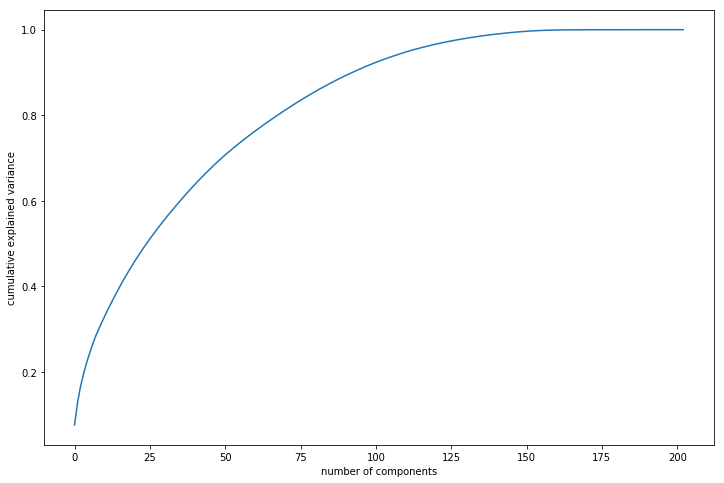

In [96]:
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Firstly, let's take the most important 54 features

In [97]:
pca_final = PCA(n_components =54 )
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape


(23962, 54)

In [98]:
#Applying selected components to the test data
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(5991, 54)

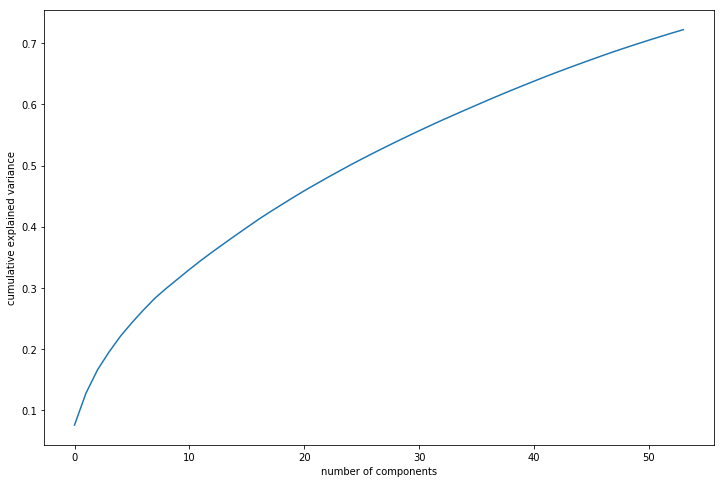

In [99]:
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca_final.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

With 54 features, almost 72% of the variance is explained.

### Logistic Regression

Lets start with Logistic Regression with default parameters

In [100]:
learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)

In [101]:
#Making prediction on the test data
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(roc_auc_score(y_test, pred_probs_test))

'0.89'

- We were able to achieve 89% Area under the curve on the test set

Let's build couple of more models with different number of components. Let's see if the results changes

In [102]:
pca_last1 = PCA(n_components=48)
df_train_pca1 = pca_last1.fit_transform(X_train)
df_test_pca1 = pca_last1.transform(X_test)
df_test_pca1.shape

(5991, 48)

In [103]:
#training the regression model
learner_pca1 = LogisticRegression()
model_pca1 = learner_pca1.fit(df_train_pca1,y_train)
#Making prediction on the test data
pred_probs_test1 = model_pca1.predict_proba(df_test_pca1)[:,1]
"{:2.2f}".format(roc_auc_score(y_test, pred_probs_test1))

'0.89'

With 48 features, we get an ROC AUC Score of 89%

In [104]:
pca_last2 = PCA(n_components=15)
df_train_pca2 = pca_last2.fit_transform(X_train)
df_test_pca2 = pca_last2.transform(X_test)
df_test_pca2.shape

(5991, 15)

In [105]:
#training the regression model
learner_pca2 = LogisticRegression()
model_pca2 = learner_pca2.fit(df_train_pca2,y_train)
#Making prediction on the test data
pred_probs_test2 = model_pca2.predict_proba(df_test_pca2)[:,1]
"{:2.2f}".format(roc_auc_score(y_test, pred_probs_test2))

'0.88'

With 15 features, we get an ROC AUC Score of 88%

## Choice of Evaluation Metric

Choosing a metric is one of the key criteria for our analysis, as the dataset is imbalanced one

<br>

<br>
*Source: Wikipedia*

**Accuracy = correct predictions / total predictions = (TP + TN)/ (all)**
For a data set which is balanced, this might make a good measure. For an imbalanced dataset like the current one, where the negative class is heavier, this measure may show a high accuracy but fail to serve the purpose of the modeling exercise. We need to be able to predict non-churn i.e.; positive outcomes correctly to help business. So Accuracy may not be the best measure here.

**Recall(sensitivity) = ability to identify Positives as true =  TP/(TP + FN)**
Considering that we wish to clearly identify customers who might churn vs non-churn, recall as a metric with its ability to identify true positives might be more apt. But this does not capture models ability to mis-classify negative class as positive i.e.; False positive rate. So, if we choose a model purely based on recall, we might be blind sighted by a huge number of false positive.

**Precision = TP/ (TP + FP) = Positive predictive value:**
It is important to not only understand the rate of identifying positives as true but also identify False positives. If business is to make a decision on marketing spend to retain customers to all positive output of the model, it becomes important that the false positive rate should not be too high. So Precision as a metric - which provides the rate of true positive /total predicted positives is an apt metric to look at here.

**F Score = 2 * Precision * Recall/ (Precision * Recall):**
Fscore is the harmonic mean of Precision and Recall and provides the ability to balance the need between having a better true positive rate and not too high a false positive rate. 

**Area under the Curve:**

AUC or in the classification world – AUC ROC – Area under the curve for  Receiver Operating Characteristic curve is generally used to compare two different models. It used two metrics from the confusion matrix the true positive rate and false positive rate.

**True positive rate (TPR), recall** as described above is proportion of positive data points correctly identified as positive by the model
**False positive rate (FPR)**, which is defined as FP/(FP+TN) is all the negative data points that are mistakenly identified as positive as a proportion of all negative data points. 

The TPR and FPR metrics are calculated for several threshold values and a curve is plotted with these. The resulting curve is called ROC. AUC is the computation of the area under ROC curve. For a model selection, we always look for maximizing the AUC for the classifier. As this value is comparable across models.

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      5339
           1       0.67      0.39      0.49       652

    accuracy                           0.91      5991
   macro avg       0.80      0.68      0.72      5991
weighted avg       0.90      0.91      0.90      5991

Accuracy for the test dataset 91.2%
ROC for the test dataset 68.1%


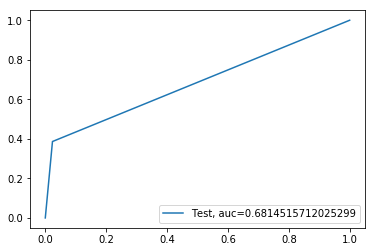

In [106]:

predictions = model_pca.predict(df_test_pca)
prediction_probs = model_pca.predict_proba(df_test_pca)[:,1]
print(classification_report(y_test, predictions))
accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()


### Logistic Regression - with penalty and balanced class weights

Use class_weight = 'balanced' for handling imbalance data

In [107]:
logmodel_CW_dict = LogisticRegression(class_weight='balanced',penalty='l2',random_state=10000,solver='newton-cg',C=1,n_jobs=-1)

In [108]:
logmodel_CW_dict.fit(df_train_pca,y_train)

LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=10000, solver='newton-cg', tol=0.0001,
                   verbose=0, warm_start=False)

              precision    recall  f1-score   support

           0       0.98      0.80      0.88      5339
           1       0.34      0.84      0.48       652

    accuracy                           0.80      5991
   macro avg       0.66      0.82      0.68      5991
weighted avg       0.91      0.80      0.84      5991

Accuracy for the test dataset 80.4%
ROC for the test dataset 81.9%


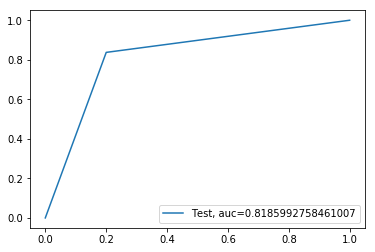

In [109]:
predictions = logmodel_CW_dict.predict(df_test_pca)
prediction_probs = logmodel_CW_dict.predict_proba(df_test_pca)[:,1]
print(classification_report(y_test, predictions))
accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

We can see that the ROC for Test Data using Logistic Regression with Balanced class weights has improved from 68.2% to 81.8%

Let's try more cross validation steps for Logistic regression

### Create Stratefied Kfold Samples


The regular K-Fold cross validation may not be applicable for an imbalanced dataset. As the folds created may not retain class proportions, even if they did, most classifiers need some manipulation of the dataset to balance it (oversampling of positive class or under sampling of negative class).
To Cross validate an imbalanced dataset, we might have to apply stratified cross validation. Stratification seeks to ensure that each fold is representative of all classes of the data. 

Random Sampling: The given dataset is highly imbalanced. Churn classes is only 10% of the entire dataset. With such a dataset random sampling might not be able to pick up enough data of both the classes
Stratified Sampling: Stratified sampling will be able to sample enough data of both the classes. But, considering that the churn class is only 10% of the entire dataset, stratified sampling might significantly reduce the number of cases, so it should ideally be coupled with a resampling technique to ensure balance in data.

In [110]:
stratefied_Kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=9999)

In [111]:
searchCV = LogisticRegressionCV(
        Cs= list(np.power(10.0, np.arange(-10, 10)))
        ,penalty='l2'
        ,scoring='roc_auc'
        ,cv=stratefied_Kfold
        ,random_state=777
        ,max_iter=100
        ,fit_intercept=True
        ,solver='newton-cg'
        ,tol=1
        ,verbose = 2
        ,n_jobs = -1)

In [112]:
searchCV.fit(df_train_pca,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    3.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    3.2s finished


LogisticRegressionCV(Cs=[1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001,
                         0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0,
                         100000.0, 1000000.0, 10000000.0, 100000000.0,
                         1000000000.0],
                     class_weight=None,
                     cv=StratifiedKFold(n_splits=4, random_state=9999, shuffle=True),
                     dual=False, fit_intercept=True, intercept_scaling=1.0,
                     l1_ratios=None, max_iter=100, multi_class='auto',
                     n_jobs=-1, penalty='l2', random_state=777, refit=True,
                     scoring='roc_auc', solver='newton-cg', tol=1, verbose=2)

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      5339
           1       0.67      0.36      0.47       652

    accuracy                           0.91      5991
   macro avg       0.80      0.67      0.71      5991
weighted avg       0.90      0.91      0.90      5991

Accuracy for the test dataset 91.2%
ROC for the test dataset 88.8%


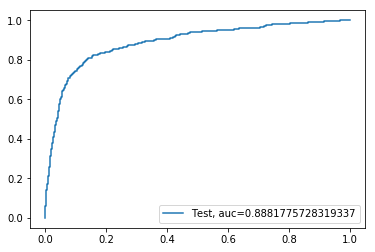

In [113]:
#train data
preds_L2Search = searchCV.predict(df_test_pca)
preds_L2Search_probs = searchCV.predict_proba(df_test_pca)[:,1]

print(classification_report(y_test, preds_L2Search))
accuracy = metrics.accuracy_score(y_test, preds_L2Search)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_L2Search_probs)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

So, for Logistic Regression, with stratified K-fold we can get better scores than balanced class option without increasing the dataset size

## Random Classifier


Let's first fit a random forest model with default hyperparameters.

In [114]:
RFC_balanced = RandomForestClassifier(class_weight = 'balanced')
TrainedRFC= RFC_balanced.fit(df_train_pca,y_train)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      5339
           1       0.71      0.30      0.43       652

    accuracy                           0.91      5991
   macro avg       0.82      0.64      0.69      5991
weighted avg       0.90      0.91      0.89      5991

Accuracy for the test dataset 91.1%
ROC for the test dataset 90.0%


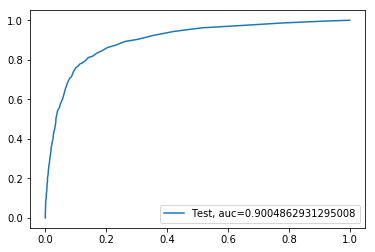

In [115]:
preds_RFC=TrainedRFC.predict(df_test_pca)
preds_probs_RFC=TrainedRFC.predict_proba(df_test_pca)[:,1]

print(classification_report(y_test, preds_RFC))
accuracy = metrics.accuracy_score(y_test, preds_RFC)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_probs_RFC)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

With default parameters, Random Forest Classifier gives an ROC Score of 90.4% and accuracy of 91%

## Hyper Tuning Random Forest

In [116]:
stime = time.clock()

param_grid = {
    'max_depth': [15,20,30],
    'min_samples_leaf': range(1, 10, 5),
    'min_samples_split': range(1,10, 5),
    'n_estimators': [200,300,400], 
    'max_features': [10,15]
}
RFC_balanced2 = RandomForestClassifier(class_weight = 'balanced')

gridF = GridSearchCV(RFC_balanced2, param_grid, cv = 3, verbose = 1, 
                      n_jobs = -1,scoring="roc_auc")
bestF = gridF.fit(df_train_pca,y_train)
etime = time.clock()
print(etime - stime)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 14.7min finished


990.492003008


              precision    recall  f1-score   support

           0       0.95      0.95      0.95      5339
           1       0.59      0.61      0.60       652

    accuracy                           0.91      5991
   macro avg       0.77      0.78      0.78      5991
weighted avg       0.91      0.91      0.91      5991

Accuracy for the test dataset 91.2%
ROC for the test dataset 90.9%


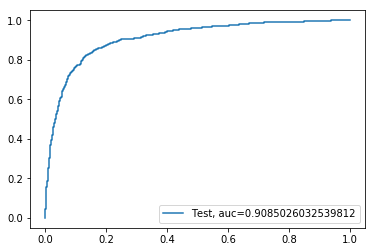

In [117]:
preds_RF = bestF.predict(df_test_pca)
preds_probs_RF = bestF.predict_proba(df_test_pca)[:,1]

print(classification_report(y_test, preds_RF))
accuracy = metrics.accuracy_score(y_test, preds_RF)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy))

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_probs_RF)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

With hyper tuned parameters, Random Forest Classifier gives an ROC Score of 91.% and accuracy of 91%

### Gradient boosting

Lets try a boosting algorithm

In [118]:
GBC = GradientBoostingClassifier()
GBC.fit(df_train_pca,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      5339
           1       0.62      0.46      0.53       652

    accuracy                           0.91      5991
   macro avg       0.78      0.71      0.74      5991
weighted avg       0.90      0.91      0.91      5991

Accuracy for the test dataset 91.1%
ROC for the test dataset 90.4%


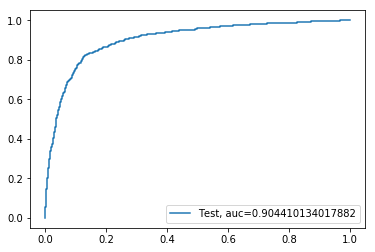

In [119]:
preds_GBC = GBC.predict(df_test_pca)
preds_probs_GBC = GBC.predict_proba(df_test_pca)[:,1]

print(classification_report(y_test, preds_GBC))
accuracy = metrics.accuracy_score(y_test, preds_GBC)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy))

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_probs_GBC)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

With default parameters, Gradient Boost Classifier gives an ROC Score of 90.4% and accuracy of 91.2%

### Gradient Boosting with Hyperparameter tuning


In [120]:
param_test = {'n_estimators':range(200,500,100), 'max_depth':range(5,8,1), 'min_samples_leaf': range(10,100,20)}

gsearch1 = GridSearchCV(
    estimator = GradientBoostingClassifier(
        learning_rate=0.05,
        min_samples_split=20,
        min_samples_leaf=10,
        subsample=0.1,
        random_state=9999,verbose = 2,), param_grid = param_test, scoring='roc_auc',n_jobs=-1,iid=False, cv=None,verbose=2)


In [121]:
gsearch1.fit(df_train_pca,y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed: 10.7min finished


      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.6686           0.0305           16.15s
         2           0.5832           0.0217           16.39s
         3           0.6058           0.0174           16.43s
         4           0.6139           0.0154           16.50s
         5           0.5921           0.0138           16.40s
         6           0.5431           0.0116           16.27s
         7           0.5346           0.0097           16.11s
         8           0.5549           0.0098           16.10s
         9           0.5443           0.0079           16.00s
        10           0.5343           0.0080           15.95s
        11           0.5250           0.0072           15.87s
        12           0.5422           0.0063           15.82s
        13           0.5109           0.0052           15.83s
        14           0.5218           0.0053           15.79s
        15           0.4997           0.0053           15.75s
       

       135           0.3749          -0.0001            9.33s
       136           0.4020           0.0000            9.27s
       137           0.3951           0.0000            9.21s
       138           0.3801          -0.0002            9.15s
       139           0.3825          -0.0002            9.09s
       140           0.3871          -0.0004            9.04s
       141           0.4048           0.0001            8.98s
       142           0.3988           0.0001            8.92s
       143           0.3946          -0.0004            8.87s
       144           0.3952          -0.0000            8.81s
       145           0.3942           0.0000            8.75s
       146           0.4090           0.0001            8.70s
       147           0.3419          -0.0000            8.64s
       148           0.3679          -0.0000            8.58s
       149           0.4017          -0.0002            8.53s
       150           0.3992           0.0000            8.47s
       1

       271           0.3507          -0.0001            1.63s
       272           0.3934          -0.0001            1.58s
       273           0.3598          -0.0000            1.52s
       274           0.3840          -0.0002            1.46s
       275           0.3821          -0.0002            1.41s
       276           0.3477           0.0000            1.35s
       277           0.3660          -0.0002            1.30s
       278           0.3674          -0.0002            1.24s
       279           0.3998           0.0003            1.18s
       280           0.3738          -0.0001            1.13s
       281           0.3625          -0.0000            1.07s
       282           0.3375          -0.0003            1.01s
       283           0.3349          -0.0001            0.96s
       284           0.3375          -0.0001            0.90s
       285           0.3846          -0.0001            0.84s
       286           0.3599          -0.0000            0.79s
       2

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.05,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=10,
                                                  min_samples_split=20,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
   

In [122]:
gsearch1.best_params_, gsearch1.best_score_

({'max_depth': 5, 'min_samples_leaf': 90, 'n_estimators': 300},
 0.8962257774727149)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      5339
           1       0.63      0.48      0.55       652

    accuracy                           0.91      5991
   macro avg       0.78      0.72      0.75      5991
weighted avg       0.90      0.91      0.91      5991

Accuracy for the test dataset 91.3%
ROC for the test dataset 90.6%


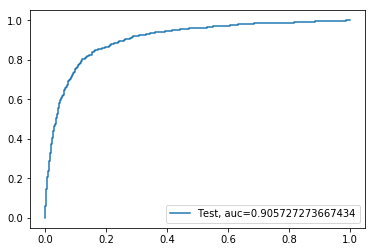

In [123]:
preds_GBC_HT = gsearch1.predict(df_test_pca)
preds_GBC_probs_HT = gsearch1.predict_proba(df_test_pca)[:,1]

print(classification_report(y_test, preds_GBC_HT))
accuracy = metrics.accuracy_score(y_test, preds_GBC_HT)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_GBC_probs_HT)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

With default parameters, Gradient Boost Classifier gives an ROC Score of 90.1% and accuracy of 91.4%

### SVM using Non-linear kernal

In [124]:
# rbf kernel with other hyperparameters kept to default 
svm_rbf = SVC(kernel='rbf',class_weight = 'balanced')
svm_rbf.fit(df_train_pca, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Classification report: 
              precision    recall  f1-score   support

           0       0.98      0.86      0.91      5339
           1       0.42      0.83      0.56       652

    accuracy                           0.86      5991
   macro avg       0.70      0.84      0.73      5991
weighted avg       0.92      0.86      0.88      5991


Accuracy for the test dataset 85.6%

ROC for the test dataset 84.3%


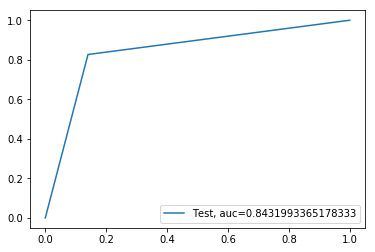

In [125]:
# predict
predictions = svm_rbf.predict(df_test_pca)
print("Classification report: ")
print(classification_report(y_test,predictions))
accuracy = metrics.accuracy_score(y_test, predictions)
print("\nAccuracy for the test dataset",'{:.1%}'.format(accuracy) )
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)
print("\nROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

With default parameters, SVM with rbf kernel gives an ROC Score of 84.7% and accuracy of 85.6%

### SVM using Linear kernal

In [126]:
# linear kernel with other hyperparameters kept to default 
svm_linear = SVC(kernel='linear',class_weight = 'balanced')
svm_linear.fit(df_train_pca, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Classification report: 
              precision    recall  f1-score   support

           0       0.98      0.81      0.88      5339
           1       0.35      0.84      0.49       652

    accuracy                           0.81      5991
   macro avg       0.66      0.82      0.69      5991
weighted avg       0.91      0.81      0.84      5991


Accuracy for the test dataset 81.0%

ROC for the test dataset 82.4%


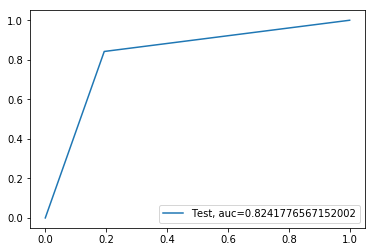

In [127]:
# predict
predictions = svm_linear.predict(df_test_pca)
print("Classification report: ")
print(classification_report(y_test,predictions))
accuracy = metrics.accuracy_score(y_test, predictions)
print("\nAccuracy for the test dataset",'{:.1%}'.format(accuracy) )
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)
print("\nROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

With default parameters, SVM with Linear kernel gives an ROC Score of 82.1% and accuracy of 81.0%

## Model Building

#### On original features (instead of principal components)
#### This is required to find out the most important features that affect the churn prediction

### Logistic Regression

In [128]:
logmodel_CW_dict = LogisticRegression(class_weight='balanced',penalty='l2',random_state=10000,solver='newton-cg',C=1,n_jobs=-1)
logmodel_CW_dict.fit(X_train,y_train)

LogisticRegression(C=1, class_weight='balanced', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=10000, solver='newton-cg', tol=0.0001,
                   verbose=0, warm_start=False)

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      5339
           1       0.38      0.86      0.53       652

    accuracy                           0.83      5991
   macro avg       0.68      0.84      0.71      5991
weighted avg       0.91      0.83      0.86      5991

Accuracy for the test dataset 83.1%
ROC for the test dataset 84.4%


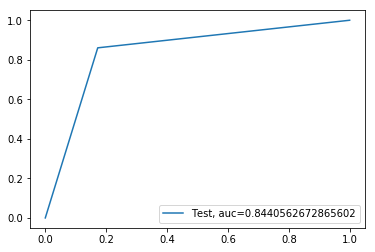

In [129]:
predictions = logmodel_CW_dict.predict(X_test)
prediction_probs = logmodel_CW_dict.predict_proba(X_test)[:,1]
print(classification_report(y_test, predictions))
accuracy = metrics.accuracy_score(y_test, predictions)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

With balanced class weights, Logisctic regression on 204 features gives an ROC Score of 84.4% and accuracy of 83.1%

### Create Stratefied Kfold Samples


In [130]:
stratefied_Kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=9999)

In [131]:
searchCV = LogisticRegressionCV(
        Cs= list(np.power(10.0, np.arange(-10, 10)))
        ,penalty='l2'
        ,scoring='roc_auc'
        ,cv=stratefied_Kfold
        ,random_state=777
        ,max_iter=100
        ,fit_intercept=True
        ,solver='newton-cg'
        ,tol=1
        ,verbose = 2
        ,n_jobs = -1)

In [132]:
searchCV.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    8.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    8.3s finished


LogisticRegressionCV(Cs=[1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001,
                         0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0,
                         100000.0, 1000000.0, 10000000.0, 100000000.0,
                         1000000000.0],
                     class_weight=None,
                     cv=StratifiedKFold(n_splits=4, random_state=9999, shuffle=True),
                     dual=False, fit_intercept=True, intercept_scaling=1.0,
                     l1_ratios=None, max_iter=100, multi_class='auto',
                     n_jobs=-1, penalty='l2', random_state=777, refit=True,
                     scoring='roc_auc', solver='newton-cg', tol=1, verbose=2)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5339
           1       0.67      0.44      0.53       652

    accuracy                           0.92      5991
   macro avg       0.80      0.71      0.74      5991
weighted avg       0.91      0.92      0.91      5991

Accuracy for the test dataset 91.6%
ROC for the test dataset 89.8%


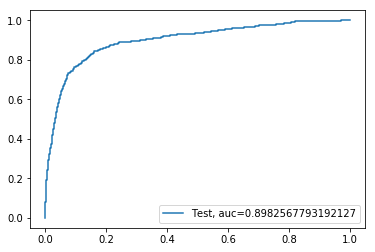

In [133]:
#train data
preds_L2Search = searchCV.predict(X_test)
preds_L2Search_probs = searchCV.predict_proba(X_test)[:,1]

print(classification_report(y_test, preds_L2Search))
accuracy = metrics.accuracy_score(y_test, preds_L2Search)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_L2Search_probs)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

With stratified K Fold technique Logisctic regression on 204 features gives an ROC Score of 89.8% and accuracy of 91.6%

## Random Forest
### With Default Parameters

In [134]:
RFC_balanced = RandomForestClassifier()
TrainedRFC= RFC_balanced.fit(X_train,y_train)

In [135]:
RFC_balanced.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      5339
           1       0.71      0.51      0.59       652

    accuracy                           0.92      5991
   macro avg       0.83      0.74      0.78      5991
weighted avg       0.92      0.92      0.92      5991

Accuracy for the test dataset 92.4%
ROC for the test dataset 92.8%


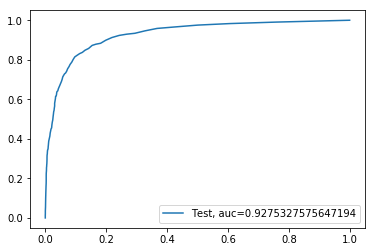

In [136]:
preds_RFC=TrainedRFC.predict(X_test)
preds_probs_RFC=TrainedRFC.predict_proba(X_test)[:,1]

print(classification_report(y_test, preds_RFC))
accuracy = metrics.accuracy_score(y_test, preds_RFC)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy) )

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_probs_RFC)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

With default parameters, Random Forest Classifier on 204 features gives an ROC Score of 93.1% and accuracy of 92.6%

## Hyper Tuning Random Forest

In [137]:
stime = time.clock()
param_grid = {
    'max_depth': [15,20,30],
    'min_samples_leaf': range(1, 10, 5),
    'min_samples_split': range(1,10, 5),
    'n_estimators': [200,300,400], 
    'max_features': [10,15]
}

RFC_balanced2 = RandomForestClassifier(class_weight = 'balanced')

gridF = GridSearchCV(RFC_balanced2, param_grid, cv = 3, verbose = 1, 
                      n_jobs = -1,scoring="roc_auc")
bestF = gridF.fit(X_train,y_train)
etime = time.clock()
print((etime - stime)/60)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   49.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  8.1min finished


9.12865752865


In [138]:
bestF.best_params_

{'max_depth': 30,
 'max_features': 15,
 'min_samples_leaf': 6,
 'min_samples_split': 6,
 'n_estimators': 400}

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      5339
           1       0.62      0.68      0.65       652

    accuracy                           0.92      5991
   macro avg       0.79      0.81      0.80      5991
weighted avg       0.92      0.92      0.92      5991

Accuracy for the test dataset 92.0%
ROC for the test dataset 93.3%


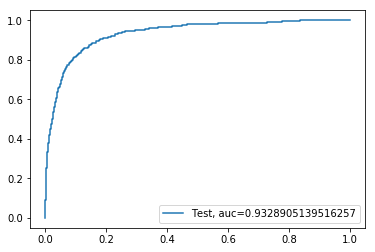

In [139]:
preds_RF = bestF.predict(X_test)
preds_probs_RF = bestF.predict_proba(X_test)[:,1]

print(classification_report(y_test, preds_RF))
accuracy = metrics.accuracy_score(y_test, preds_RF)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy))

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_probs_RF)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

With hyper tuned parameters, Random Forest Classifier gives an ROC Score of 93.4% and accuracy of 92.2%


### SVM using Non-linear kernal

In [140]:
# rbf kernel with other hyperparameters kept to default 
svm_rbf = SVC(kernel='rbf',class_weight = 'balanced')
svm_rbf.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Classification report: 
              precision    recall  f1-score   support

           0       0.97      0.88      0.93      5339
           1       0.45      0.81      0.58       652

    accuracy                           0.87      5991
   macro avg       0.71      0.84      0.75      5991
weighted avg       0.92      0.87      0.89      5991


Accuracy for the test dataset 87.3%

ROC for the test dataset 84.4%


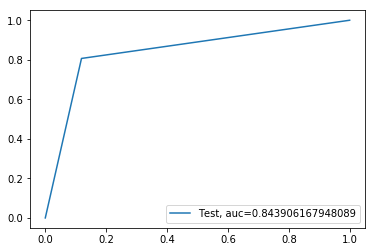

In [141]:
# predict
predictions = svm_rbf.predict(X_test)
print("Classification report: ")
print(classification_report(y_test,predictions))
accuracy = metrics.accuracy_score(y_test, predictions)
print("\nAccuracy for the test dataset",'{:.1%}'.format(accuracy) )
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)
print("\nROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

With default parameters, SVM with rbf kernel on 204 features gives an ROC Score of 84.4% and accuracy of 87.3%

### SVM using Linear kernal

In [142]:
# linear kernel with other hyperparameters kept to default 
svm_linear = SVC(kernel='linear',class_weight = 'balanced')
svm_linear.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Classification report: 
              precision    recall  f1-score   support

           0       0.98      0.83      0.90      5339
           1       0.37      0.85      0.52       652

    accuracy                           0.83      5991
   macro avg       0.68      0.84      0.71      5991
weighted avg       0.91      0.83      0.85      5991


Accuracy for the test dataset 82.8%

ROC for the test dataset 83.8%


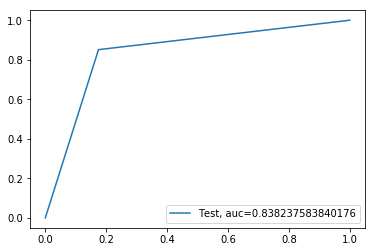

In [143]:
# predict
predictions = svm_linear.predict(X_test)
print("Classification report: ")
print(classification_report(y_test,predictions))
accuracy = metrics.accuracy_score(y_test, predictions)
print("\nAccuracy for the test dataset",'{:.1%}'.format(accuracy) )
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)
print("\nROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.legend(loc=4)
plt.show()

With default parameters, SVM with linear kernel on 204 features gives an ROC Score of 83.8% and accuracy of 82.8%

## Summary about the models

- We trained different machine learning models to solve this classification problems. 
- Both with PCA and without PCA, Random Forest Classifier performed the best when compared with other models.
- The Random Forest Classifier was able to provide the same performance of the models with Balanced Class option and without balanced class option.
- The **Algorithmic Ensemble Techniques** like Gradient Boosting Algorithm was able to provide almost same performance as Random Forest Classifier
- Logistic Regression works bad with imbalanced data. When using Balanced Class option, Logistic regression works quite decent.
- Performace of SVM with Linear and Non- Linear Kernels was improved with balanced class weights option. Still the performance was lesser when compared to Logistic Regression and Random Forest.
- We considered F1-score and Area under the curve as the primary metrics for the evaluation 

Lets see again the best model

In [144]:
RFCBest = RandomForestClassifier(max_depth= 30,
 max_features= 15,
 min_samples_leaf= 6,
 min_samples_split =  6,
 n_estimators= 300, class_weight = 'balanced')
TrainedRFC= RFCBest.fit(X_train,y_train)

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      5339
           1       0.63      0.68      0.65       652

    accuracy                           0.92      5991
   macro avg       0.79      0.82      0.80      5991
weighted avg       0.92      0.92      0.92      5991

Accuracy for the test dataset 92.1%
ROC for the test dataset 93.4%


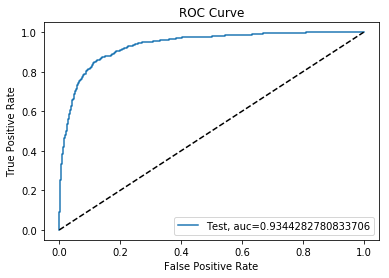

In [145]:
preds_RF = TrainedRFC.predict(X_test)
preds_probs_RF = TrainedRFC.predict_proba(X_test)[:,1]

print(classification_report(y_test, preds_RF))
accuracy = metrics.accuracy_score(y_test, preds_RF)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy))

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_probs_RF)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot()
plt.legend(loc=4)
plt.show()

Hyper Tuning of Random Forest provided the best metrics out of all.
Best Params are as follows: 


    {'max_depth': 30,
     'max_features': 15,
     'min_samples_leaf': 6,
     'min_samples_split': 6,
     'n_estimators': 300}
 
 We got an accuracy on test data as 92.2% and ROC on test data as 93.4%.
 More metrics of this model are as below
      
            precision    recall    f1-score  support

       0       0.96      0.95      0.96      5339
       1       0.63      0.68      0.65       652

In [146]:
importances = TrainedRFC.feature_importances_
col_names =  X.columns

RF_feature_importance = pd.DataFrame(sorted(zip(importances, list(col_names)), reverse=True))
RF_feature_importance.rename(columns={0:'value', 1 :'colName'},inplace =True)
RF_feature_importance.head()

,value,colName
0,0.06,loc_ic_mou_8
1,0.05,loc_og_t2m_mou_8
2,0.05,loc_ic_t2m_mou_8
3,0.04,loc_og_mou_8
4,0.04,loc_og_t2t_mou_8


##### Lets choose top 20 important features and build a Random Forest Model

In [147]:
imp_features = RF_feature_importance.head(20)

In [148]:
X_imp = telecom_df[list(imp_features.colName.unique())]
Y_imp = telecom_df['churn_flag']

In [149]:
X_imp_std = scaler.fit_transform(X_imp)
X_imp_train, X_imp_test, y_imp_train, y_imp_test = train_test_split(X_imp_std,Y_imp, train_size=0.8,test_size=0.2,random_state=111)

In [150]:
RF_imp=RandomForestClassifier(max_depth= 30,
 max_features= 15,
 min_samples_leaf= 6,
 min_samples_split =  6,
 n_estimators= 300, class_weight = 'balanced',random_state=111)
RF_imp.fit(X_imp_train, y_imp_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=30, max_features=15,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=111,
                       verbose=0, warm_start=False)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      5339
           1       0.58      0.69      0.63       652

    accuracy                           0.91      5991
   macro avg       0.77      0.82      0.79      5991
weighted avg       0.92      0.91      0.92      5991

Accuracy for the test dataset 91.2%
ROC for the test dataset 91.5%


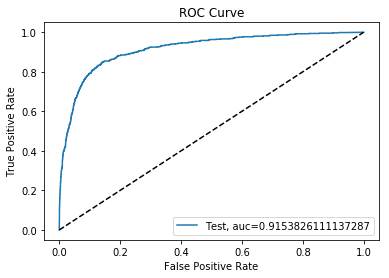

In [151]:
preds_RF = RF_imp.predict(X_imp_test)
preds_probs_RF = RF_imp.predict_proba(X_imp_test)[:,1]

print(classification_report(y_test, preds_RF))
accuracy = metrics.accuracy_score(y_test, preds_RF)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy))

fpr, tpr, threshold = metrics.roc_curve(y_test, preds_probs_RF)
roc_auc = metrics.auc(fpr, tpr)
print("ROC for the test dataset",'{:.1%}'.format(roc_auc))
plt.plot(fpr,tpr,label="Test, auc="+str(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot()
plt.legend(loc=4)
plt.show()

We train our random forest algorithm on the top 20 features that we selected above and then we evaluated the performance of our algorithm on the training and testing sets. We can see that the AUC & F1-score are pretty similar to a model trained with all 204 features which means our model is not overfitting.

In [152]:
imp_features

,value,colName
0,0.06,loc_ic_mou_8
1,0.05,loc_og_t2m_mou_8
2,0.05,loc_ic_t2m_mou_8
3,0.04,loc_og_mou_8
4,0.04,loc_og_t2t_mou_8
5,0.03,arpu_8
6,0.03,last_day_rch_amt_8
7,0.03,loc_ic_t2t_mou_8
8,0.02,offnet_mou_8
9,0.02,date_of_last_rech_day_8


So, we can conclude that these are the important indicators of churn

## Recommendations to Business 


- From the above we can clearly infer that calls related incoming & outgoing within a circle is key for identifying churn customers 
- Calls made to other operators as well as to same operators are key for identyfing churn customers
- Average revenue per user is also a key indicator for identifying the churn, if ARPU is lesser, theen their usage of the network is reduced and the customer is going to be churned
- The day when last recharged also made an impact in identifying churm customers
- Especially the usage during the action phase when compared to good month (7th month) has reduced
- The other key factor is if the recharge amount shows a dip in the action phase is sign of churn



In [153]:
e1time = time.clock()

In [154]:
print('Execution time is {0} mins'.format((e1time-s1time)/60))

Execution time is 62.45464505766667 mins
